# TASK 1
## Data Exploration

Data [Source](https://www.kaggle.com/datasets/gabrielsantello/advertisement-click-on-ad)

### Dataset Description
| Feature                    | Description                                               | Type            |
|----------------------------|-----------------------------------------------------------|-----------------|
| Unnamed: 0                 | ID Customers                                              | Numeric         |
| Daily Time Spent on a Site | Time spent by the user on a site in minutes.              | Numeric         |
| Age                        | Customer's age in terms of years.                         | Numeric         |
| Area Income                | Average income of geographical area of consumer.          | Numeric         |
| Daily Internet Usage       | Average minutes in a day consumer is on the internet.    | Numeric         |
| Male                       | Whether or not a consumer was male.                       | Categorical     |
| Timestamp                  | Time at which user clicked on an Ad or the closed window. | Categorical     |
| Clicked on Ad              | No or Yes is indicated clicking on an Ad.                 | Target Variable |
| city                       | City of the consumer.                                     | Categorical     |
| province                   | Province of the consumer.                                 | Categorical     |
| category                   | Category of the advertisement.                            | Categorical     |

In [1]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
# Remove Warnings
import warnings 
warnings.filterwarnings("ignore")

In [3]:
# Load Dataset
df = pd.read_csv('https://drive.google.com/u/0/uc?id=1WwLxmK8PMLjjgG_Zh1Nkh02ZN2-3Wiyl&export=download')
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


## Exploratory Data Analysis (EDA)

In [4]:
df_eda = df.copy()

### Data Exploration & Statistical Analysis

In [5]:
print("Shape of data :", df_eda.shape)
print("Number of rows :", df_eda.shape[0])
print("Number of columns :", df_eda.shape[1])

Shape of data : (1000, 11)
Number of rows : 1000
Number of columns : 11


In [6]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


**Observations:**

- The dataset has 1000 rows and 11 columns.
- `Unnamed: 0` column is identified as ID that can be dropped or renamed if necessary.
- Contains 3 data types: float64, int64, object.
- Timestamp column data type will be changed to datetime instead of object.
- `Male` column contains 2 unique values, which will be renamed to `Gender`
- There are 4 columns containing null values.

In [7]:
# check descriptive statistics for numerical feature
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,4.995000e+02,2.888194e+02,0.00,2.497500e+02,4.995000e+02,7.492500e+02,9.990000e+02
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


In [8]:
# check descriptive statistics for categorical feature
df_eda.describe(include = object).T

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


In [9]:
# data types per feature
nums = df_eda.select_dtypes(['int64', 'float64']).columns
cats = df_eda.select_dtypes(['object']).columns

In [10]:
# display value counts for categorical features
for col in cats:
  print(f'{col} has {df_eda[col].nunique()} with data dtypes: {df_eda[col].dtypes} ')
  print(df_eda[col].value_counts())
  print()

Male has 2 with data dtypes: object 
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64

Timestamp has 997 with data dtypes: object 
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/15/2016 3:10     1
4/5/2016 8:18      1
                  ..
5/12/2016 4:35     1
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
6/3/2016 21:43     1
Name: Timestamp, Length: 997, dtype: int64

Clicked on Ad has 2 with data dtypes: object 
No     500
Yes    500
Name: Clicked on Ad, dtype: int64

city has 30 with data dtypes: object 
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang     

### Feature Engineering for EDA

#### Changing data type of `Timestamp`

In [11]:
# Checking data type
df_eda['Timestamp'].dtypes

dtype('O')

In [12]:
import datetime as dt

In [13]:
df_eda['Timestamp'] = pd.to_datetime(df_eda['Timestamp'])
df_eda['Timestamp'].dtypes

dtype('<M8[ns]')

In [14]:
df_eda['Timestamp'].dt.year.unique()

array([2016], dtype=int64)

Year is only in 2016

In [15]:
df_eda['Timestamp'].dt.month.unique()

array([3, 4, 1, 6, 5, 7, 2], dtype=int64)

#### Rename "Unnamed: 0" to "ID"

In [16]:
df_eda.rename(columns = {"Unnamed: 0" : "ID"}, inplace = True)

#### Rename "Male" to "Gender"

In [17]:
df_eda.rename(columns = {"Male" : "Gender"}, inplace = True)

### Univariate Analysis

In [18]:
# data types per feature
nums = df_eda.select_dtypes(['int64', 'float64']).columns
cats = df_eda.select_dtypes(['object']).columns

print(nums)
print(cats)

Index(['ID', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage'],
      dtype='object')
Index(['Gender', 'Clicked on Ad', 'city', 'province', 'category'], dtype='object')


#### Numerical Columns

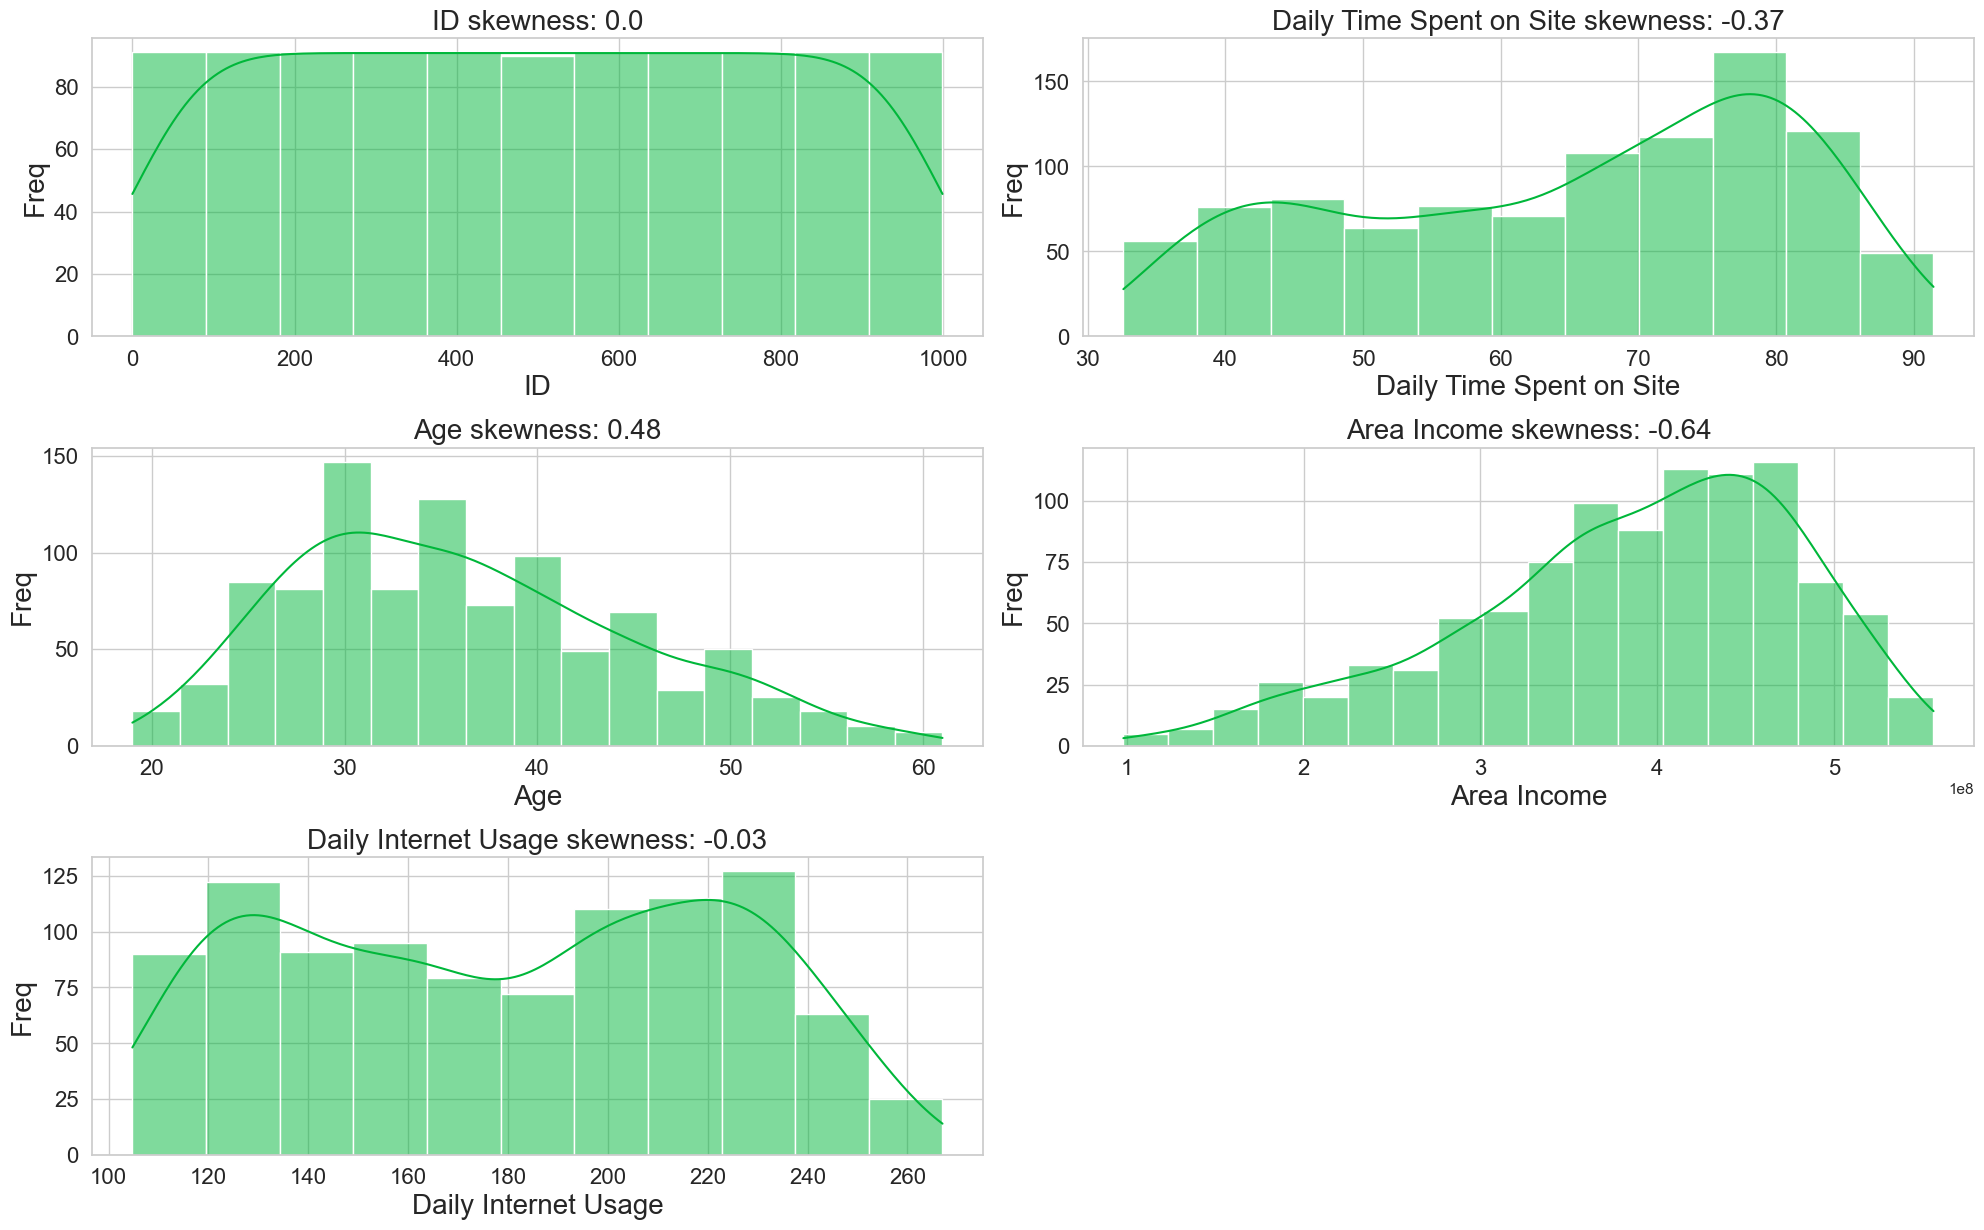

In [19]:
nums_skewness = df_eda[nums].skew()

plt.figure(figsize=(20, 20))
for i in range(len(nums)):
    plt.subplot(len(nums)//1, 2, i+1)
    ax = sns.histplot(
        df_eda[nums[i]],
        kde = True,
        color = '#00b73a'
    )
    ax.set_xlabel(str(nums[i]), fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.tick_params(labelsize=16)
    ax.set_title(str(nums[i]) + ' skewness: ' + str(round(nums_skewness[i], 2)), fontsize = 20)
plt.tight_layout()
# plt.savefig('num histplot.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

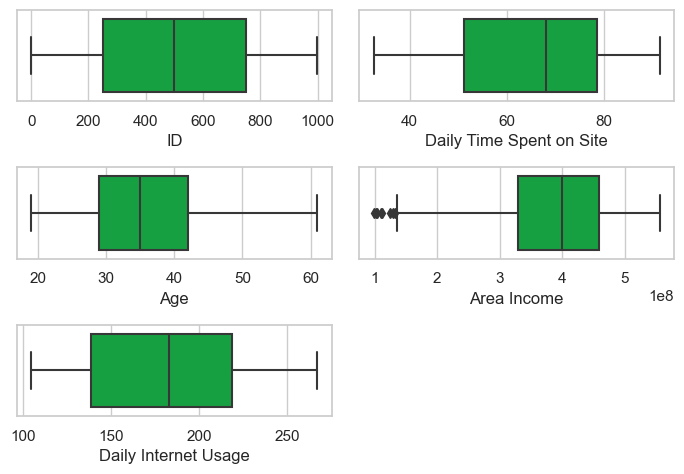

In [20]:
plt.figure(figsize=(7,6))
for i in range(0, len(nums)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=df_eda[nums[i]], color='#00b73a')
    plt.xlabel(nums[i])
    plt.tight_layout()

**Observation:**

Almost all numerical columns seem to have symmetrical(normal) distribution, except `Income` column (left skewed).

#### Categorical Columns

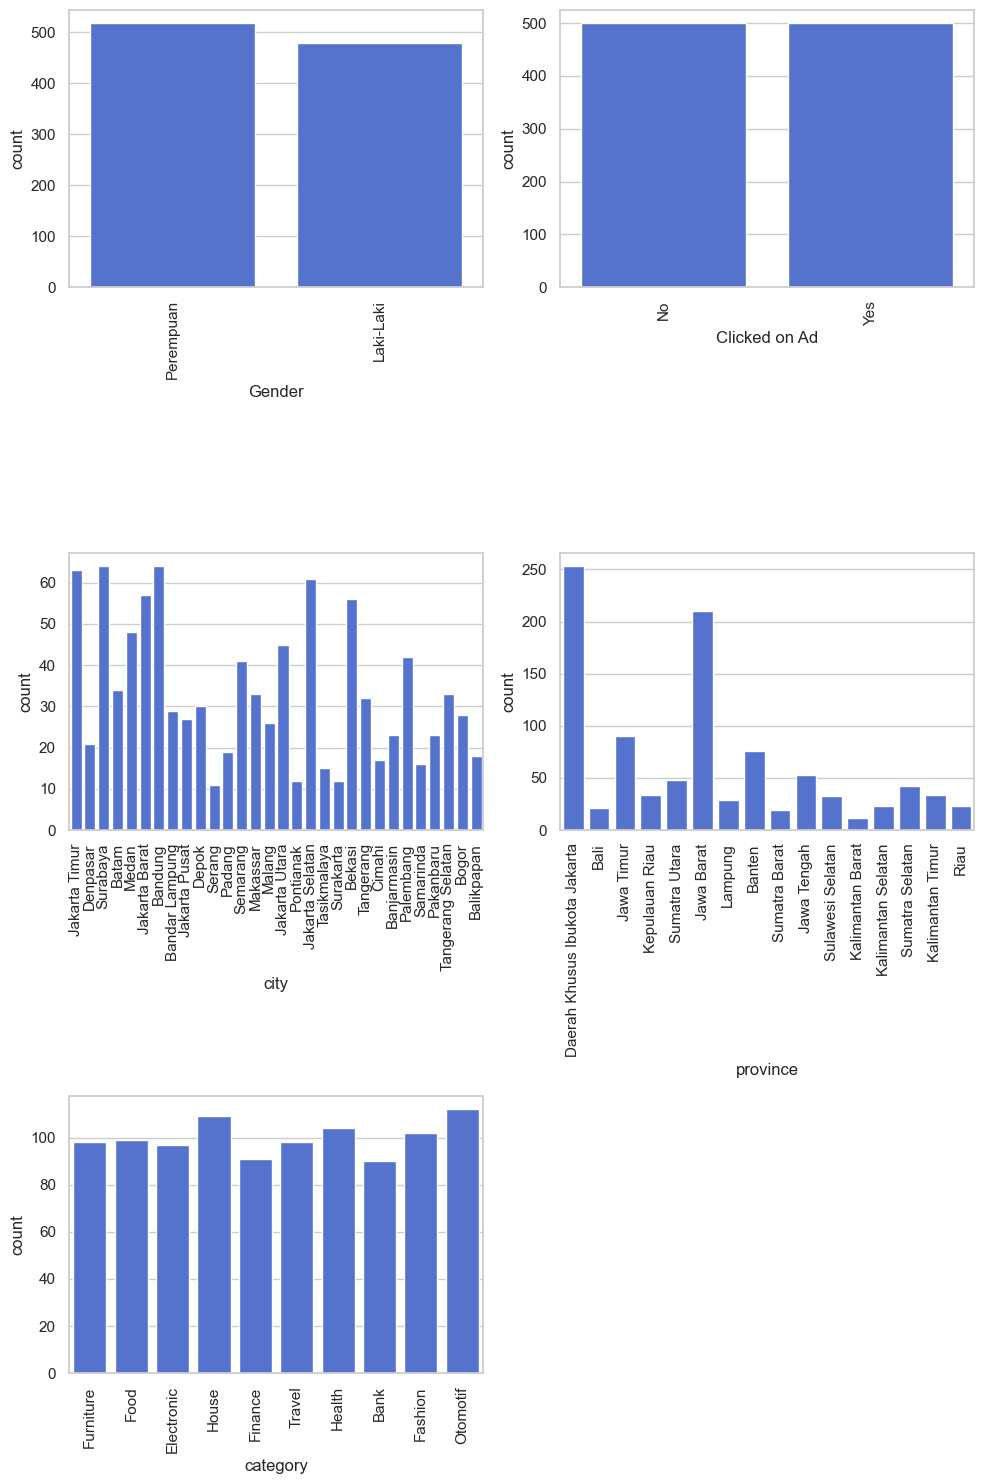

In [21]:
plt.figure(figsize=(10,15))
for i in range(0, len(cats)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df_eda[cats[i]],color='royalblue')
    plt.xlabel(cats[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

**Observations:**

- In `Gender` column has almost balance value between "Laki-laki" or "Perempuan".
- `Clicked on Ad` column has balanced value.
- `province` column has 2 dominant value, that is "Daerah Khusus Ibukota Jakarta" and "Jawa Barat".
- `Category` column has most likely balanced value.


### Bivariate Analysis

#### Numerical Features

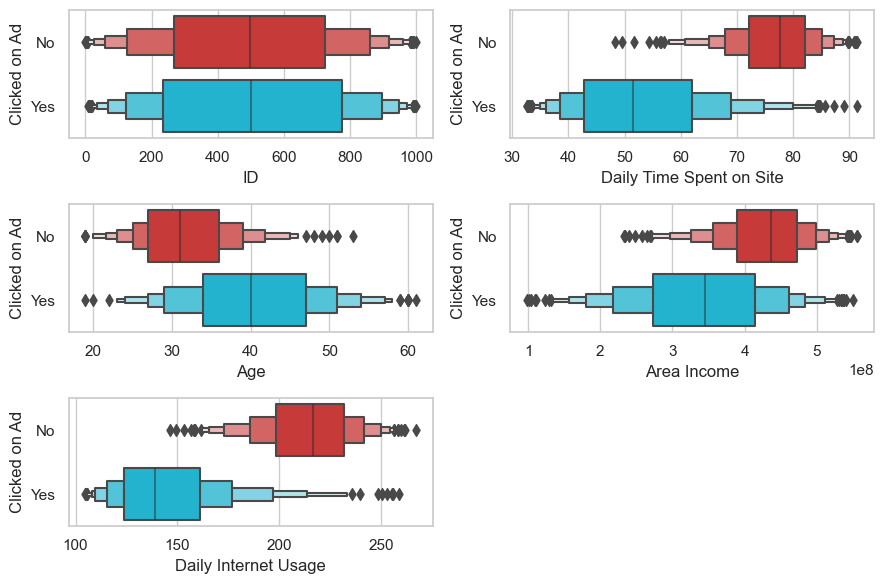

In [22]:
# bivariate analysis: boxenplot
plt.figure(figsize = (9,6))
for i in range(len(nums)):
  plt.subplot(3, 2, i + 1)
  sns.boxenplot(y = df_eda['Clicked on Ad'], x = df_eda[nums[i]], palette = {"Yes":"#08c7ea", "No":"#dd2323"}, orient = 'h')
  plt.tight_layout()

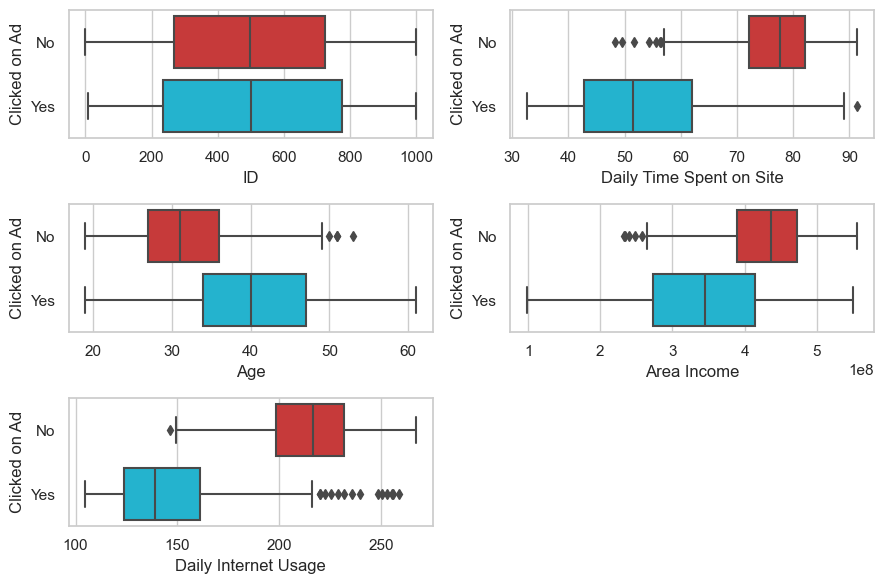

In [23]:
# bivariate analysis: boxplot
plt.figure(figsize = (9,6))
for i in range(len(nums)):
  plt.subplot(3, 2, i + 1)
  sns.boxplot(x = df_eda[nums[i]], y = df_eda['Clicked on Ad'], palette = {"Yes":"#08c7ea", "No":"#dd2323"})
  plt.tight_layout()

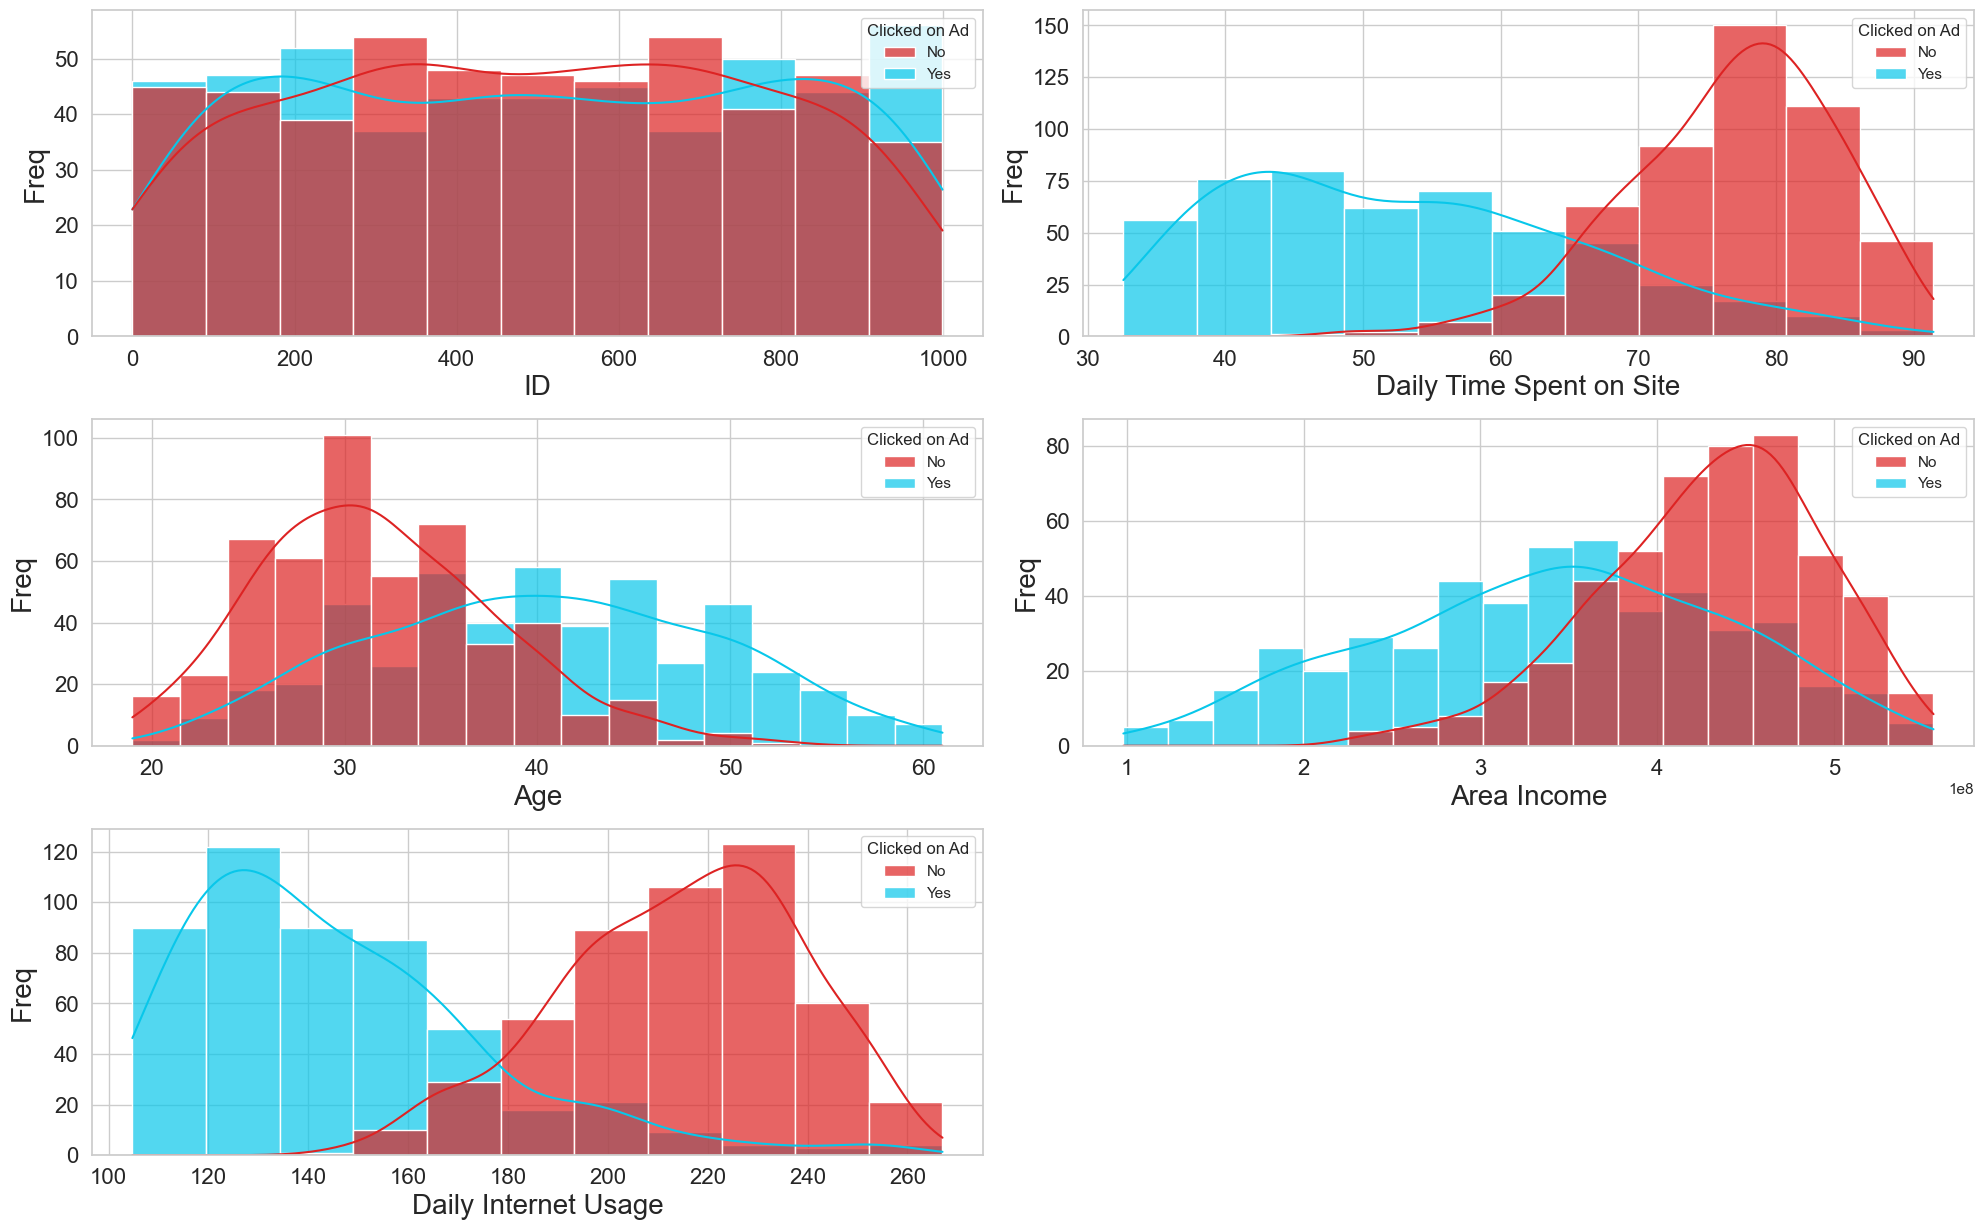

In [24]:
plt.figure(figsize=(20, 20))
for i in range(len(nums)):
    plt.subplot(len(nums)//1, 2, i+1)
    ax = sns.histplot(
        x = df_eda[nums[i]],
        kde = True,
        #hue_order = ["yes", "no"],
        palette = {"Yes":"#08c7ea", "No":"#dd2323"},
        hue = df_eda["Clicked on Ad"],
        alpha = 0.7
    )
    ax.set_xlabel(str(nums[i]), fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig('num histplot biv.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

**Observations:**

- `ID` column has a balance distribution for "Yes" and "No".
- The longer time spent on site, the more probability of customers won't click the ads. And vice versa.
- The average `Age` of customers that clicked the ads is 40 years old and not clicked the ads are 31 years old.
- The more `Income` that customers get, the more probability of customers won't click the ads. And vice versa.
- Customers that have not clicked the ads have more `Daily Internet Usage` around 220 minutes per day, however, the customers who clicked the ads have around 140 per day.

#### Categorical Features

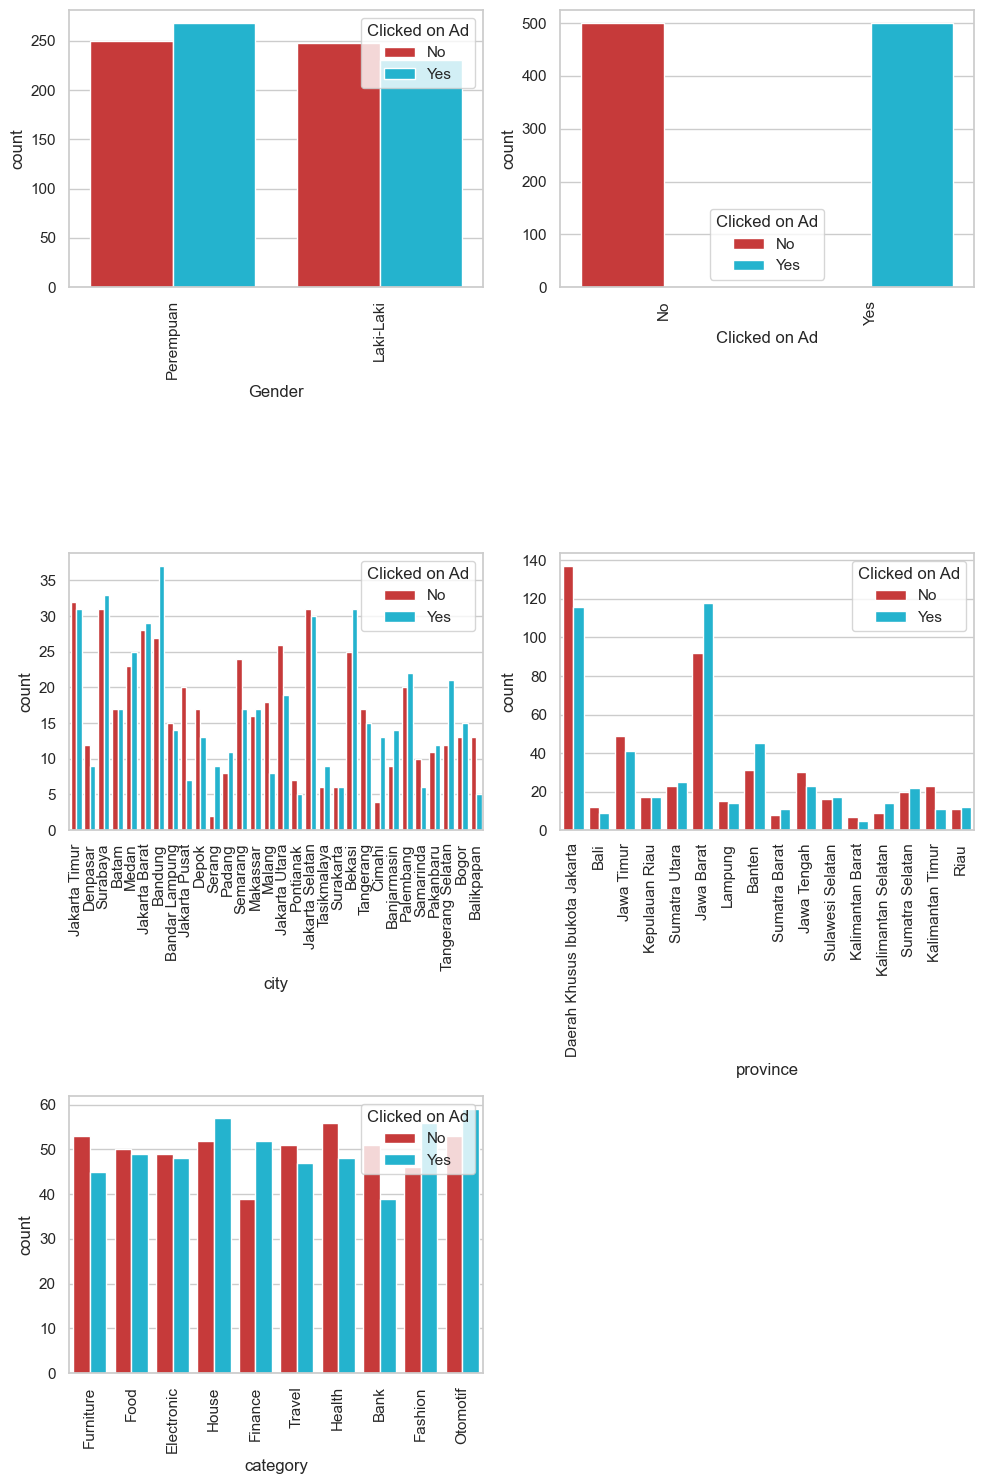

In [25]:
plt.figure(figsize=(10,15))
for i in range(0, len(cats)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df_eda[cats[i]], hue=df_eda['Clicked on Ad'], palette = {"Yes":"#08c7ea", "No":"#dd2323"})
    plt.xlabel(cats[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

**Observations:**

- "Perempuan" tends to do more clicked on ads than "Laki-laki"
- The highest amount of clicked on ads by `city` was in Bandung, Surabaya, and Bekasi.
- The top 3 highest amount of clicked on ads are "Daerah Khusus Ibukota Jakarta", "Jawa Barat", dan "Banten"
- The top 3 highest amount of customers who clicked on ads are "Otomotif", "House", and Fashion. Meanwhile "Health" category has the most customers who not clicked on ads.

### Multivariate Analysis

<Figure size 1000x600 with 0 Axes>

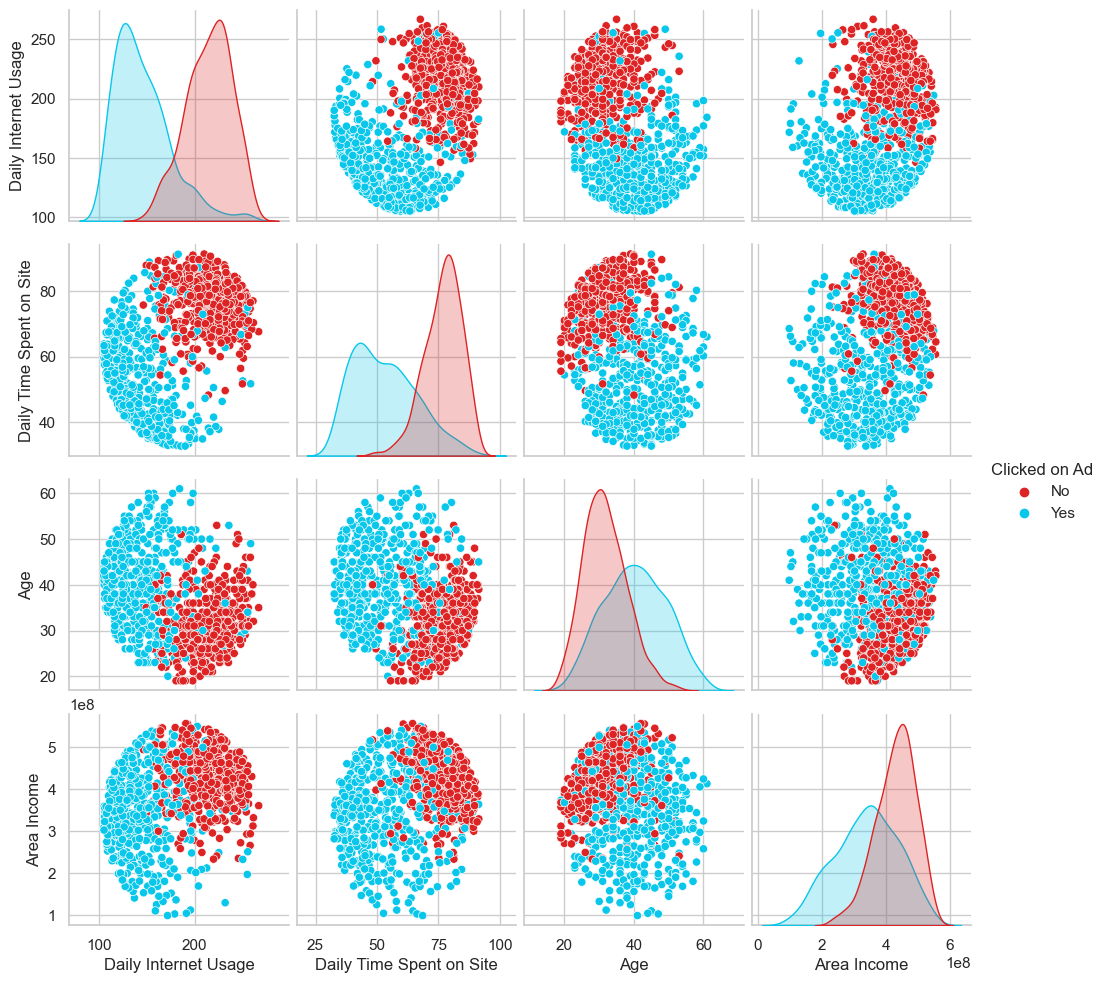

In [26]:
# bivariate analysis: pairplot
plt.figure(figsize = (10, 6))
sns.pairplot(df_eda[['Daily Internet Usage', 'Daily Time Spent on Site', 'Age', 'Area Income', 'Clicked on Ad']],
             diag_kind = 'kde',
             hue = 'Clicked on Ad',
             palette = {"Yes":"#08c7ea", "No":"#dd2323"})
plt.show()

**Observations:**

- The older `Age` and the more `Daily Time Spent on Site` and `Daily Internet Usage` of customers to click on ads.
- The lower `Daily Internet Usage` and `Daily Time Spent on Site`, the more users tend to click on ads.
- The lower customers' income, the higher `Daily Internet Usage` and `Daily Time Spent on Site`.

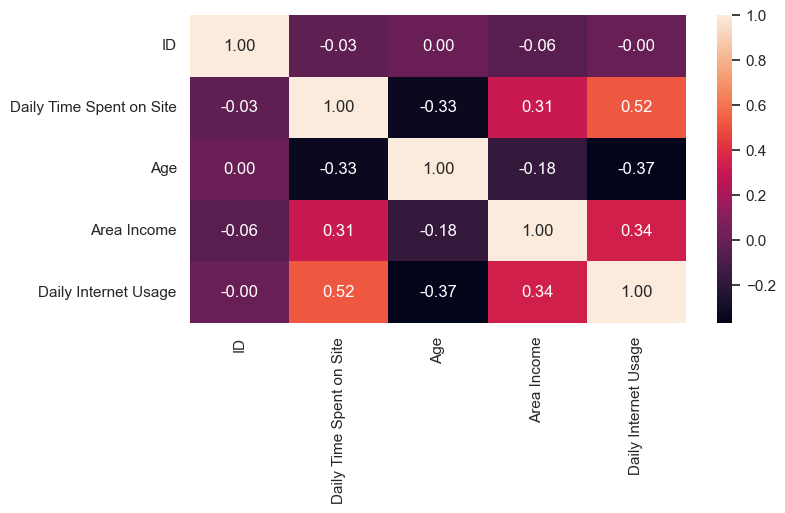

In [27]:
plt.figure(figsize=(8, 4))
sns.heatmap(df_eda.corr(), annot=True, fmt='.2f')
plt.show()

**Observations:**

Parameter:
- 0 : There is no correlation between the two variables
- 0 – 0.25 : Very weak correlation
- 0.25 – 0.5 : Correlation is medium
- 0.5 – 0.75 : Strong correlation
- 0.75 – 0.99 : Very strong correlation
- 1 : Correlation perfect positive correlation
- -1 : Correlation of perfect negative correlation

Insight:
- `Daily Time Spent on Site` has **strong positive** correlation with `Daily Internet Usage`, **medium positive** correlation with `Area Income`, and **medium negative** correlation with `Age`.
- `Age` has **medium negative** correlation with `Daily Internet Usage` and `Daily Time Spent on Site`.
- `Area Income` has **medium positive** correlation with `Daily Internet Usage` and `Daily Time Spent on Site`.
- `Daily Internet Usage` has **positive strong** correlation with `Daily Time Spent on Site`, **medium negative** correlation with `Age`, and **medium positive** correlation with `Area Income`.

# Task 2 - Data Cleaning & Processing

In [28]:
# Create a backup
df2 = df.copy()
df2.sample()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
348,348,76.2,37,525310450.0,178.51,Perempuan,2/29/2016 19:26,No,Bandar Lampung,Lampung,Electronic


In [29]:
# Dividing data types
nums = df2.select_dtypes(['int64', 'float64']).columns
cats = df2.select_dtypes(['object']).columns

## Handling Missing Value

In [30]:
# Checking missing values

print('Missing values status:', df2.isnull().values.any())
nvc = pd.DataFrame(df2.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df2.shape[0])*100
# nvc["Data Type"] = [df2[col].dtype for col in df2.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
nvc

Missing values status: True


,Total Null Values,Percentage
Daily Time Spent on Site,13,1.3
Area Income,13,1.3
Daily Internet Usage,11,1.1
Male,3,0.3
Unnamed: 0,0,0.0
Age,0,0.0
Timestamp,0,0.0
Clicked on Ad,0,0.0
city,0,0.0
province,0,0.0


There are 4 columns containing missing values i.e. `Daily Time Spent on Site`, `Area Income`, `Daily Internet Usage`, `Male`.

### Numerical Columns

In [31]:
df2.describe().T[['mean','min','25%','50%','75%','max']]

,mean,min,25%,50%,75%,max
Unnamed: 0,4.995000e+02,0.00,2.497500e+02,4.995000e+02,7.492500e+02,9.990000e+02
Daily Time Spent on Site,6.492952e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,3.600900e+01,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,3.848647e+08,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,1.798636e+02,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


**Observations:**

- By considering from univariate analysis above and missing values, the numerical column that has missing values and skewed distribution is `Area Income` column. Hence, we use **median** as an imputation.
- The other numerical columns' null values will be input with **mean**. 

### Categorical Columns

In [32]:
df2[cats].describe().T

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


**Observations:**

Null values containing in `Male` column will be input with **mode**.

In [33]:
# imputation median to null values for numerical feature
# 'Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage'
df2['Daily Time Spent on Site'].fillna(df2['Daily Time Spent on Site'].median(),inplace=True)
df2['Area Income'].fillna(df2['Area Income'].median(),inplace=True)
df2['Daily Internet Usage'].fillna(df2['Daily Internet Usage'].median(),inplace=True)

# imputation mean to null values for numerical feature
# 'Area Income'
df2['Area Income'].fillna(df2['Area Income'].median(),inplace=True)

#imputation mode for categorical feature
df2['Male'].fillna(df2['Male'].mode()[0],inplace=True)

#recheck null values
df2.isnull().sum() 

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

## Handling Duplicated Data

In [34]:
print('Containing duplicated data:', df2.duplicated().any())
print('Amount of duplicated data:', df2.duplicated().sum())

Containing duplicated data: False
Amount of duplicated data: 0


## Feature Engineering

### Feature Extraction

In [35]:
# Extracting `Timestamp` column to get 'Date',`Time','Week','Weekday','Year`,`Month`,and `Day` columns

# Changing "Timestamp" data type to datetime
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])

# Separating date from timestamp
df2['Date'] = [d.date() for d in df2['Timestamp']]

# Separating time from timestamp
df2['Time'] = [d.time() for d in df2['Timestamp']]

# Creating week column
df2['Week'] = df2.Timestamp.dt.isocalendar().week
df2.Week = df2.Week.astype('int64')

# Creating weekdau column, O means monday till 7 means sunday
df2['Weekday'] = df2['Timestamp'].dt.dayofweek 

# Getting Year, Month, Day columns
df2['Date'] = df2['Date'].astype(str)
df_date = df2['Date'].str.split('-', expand=True)
df_date = df_date.rename(columns={0:'Year',1:'Month',2:'Day'})

df_date['Year'] = df_date['Year'].astype('int64')
df_date['Month'] = df_date['Month'].astype('int64')
df_date['Day'] = df_date['Day'].astype('int64')

# Join table
df2 = df2.join(df_date)
df2.sample(3)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Date,Time,Week,Weekday,Year,Month,Day
251,251,61.22,45,447186670.0,119.03,Laki-Laki,2016-01-05 09:42:00,Yes,Palembang,Sumatra Selatan,Fashion,2016-01-05,09:42:00,1,1,2016,1,5
95,95,72.84,26,370777540.0,238.63,Perempuan,2016-07-08 21:18:00,No,Pakanbaru,Riau,Finance,2016-07-08,21:18:00,27,4,2016,7,8
723,723,48.22,40,517180370.0,214.33,Perempuan,2016-03-22 19:14:00,No,Surabaya,Jawa Timur,Food,2016-03-22,19:14:00,12,1,2016,3,22


### Simplifying Value in `Province`

In [36]:
df2.replace('Daerah Khusus Ibukota Jakarta','DKI Jakarta',inplace=True)

## Handling Outlier

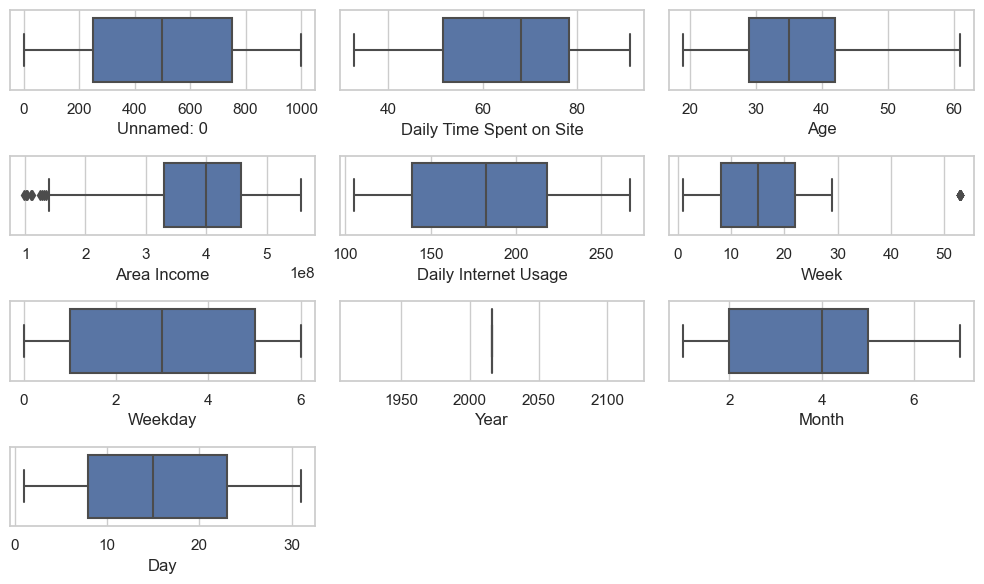

In [37]:
# Boxplot
pre_nums = df2.select_dtypes(['float64', 'int64']).columns
plt.figure(figsize = (10, 6))
for i in range(len(pre_nums)):
  plt.subplot(4, 3, i + 1)
  sns.boxplot(x = df2[pre_nums[i]])
  plt.tight_layout()

> Outliers will be handled with IQR method

In [38]:
## Option 1

# # Handling with IQR 
# Q1 = (df[['Area Income']]).quantile(0.25)
# Q3 = (df[['Area Income']]).quantile(0.75)

# IQR = Q3 - Q1
# print('The IQR value of each variable is: ')
# print(IQR)

# maximum = Q3 + (1.5*IQR)
# print('Maximum Value of each Variable is:')
# print(maximum)

# minimum = Q1 - (1.5*IQR)
# print('\nManimum Value of each Variable is:')
# print(minimum)
# more_than = (df > maximum)
# lower_than = (df < minimum)
# df = df .mask(more_than, maximum, axis=1)
# df = df.mask(lower_than, minimum, axis=1)
# print('\nData distribution after outlier handling: ')
# print(df[['Area Income']].describe())

In [39]:
## Option 2

# handle outlier with IQR
print('Jumlah sebelum filter:', len(df2))

for i in pre_nums:
  Q1 = df2[i].quantile(0.25)
  Q3 = df2[i].quantile(0.75)
  IQR = Q3 - Q1
  low_limit = Q1 - (1.5 * IQR)
  high_limit = Q3 + (1.5 * IQR)
  filtered_entries = (df2[i] >= low_limit) & (df2[i] <= high_limit)
  df2 = df2[filtered_entries]

print('Jumlah setelah filter:', len(df2))

Jumlah sebelum filter: 1000
Jumlah setelah filter: 972


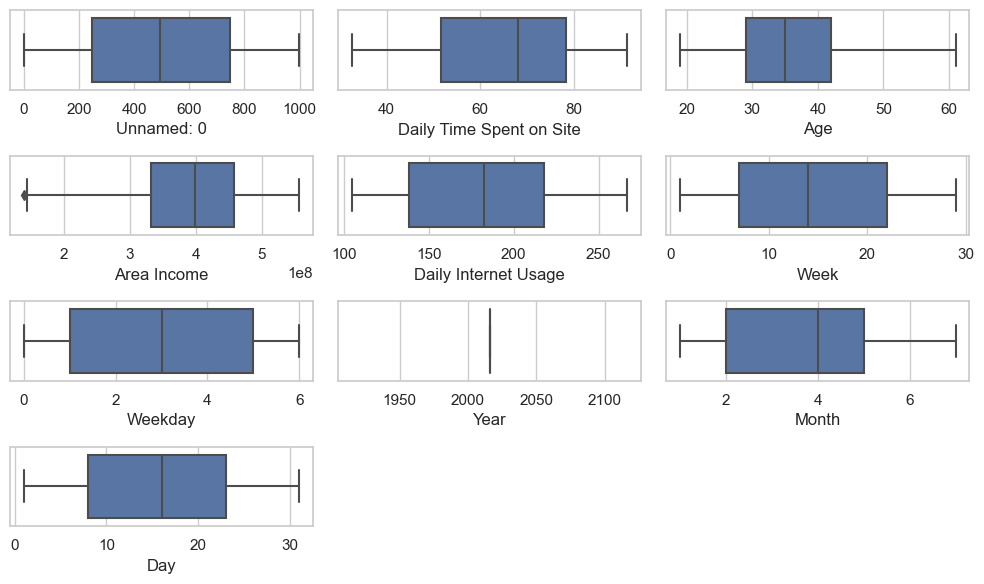

In [40]:
# Recheck Boxplot
plt.figure(figsize = (10, 6))
for i in range(len(pre_nums)):
  plt.subplot(4, 3, i + 1)
  sns.boxplot(x = df2[pre_nums[i]])
  plt.tight_layout()

## Feature Encoding

In [41]:
df2_enc = df2.copy()
df2_enc.sample()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Date,Time,Week,Weekday,Year,Month,Day
564,564,64.75,36,441007210.0,117.66,Perempuan,2016-04-06 01:19:00,Yes,Jakarta Timur,DKI Jakarta,Travel,2016-04-06,01:19:00,14,2,2016,4,6


In [42]:
df2_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                972 non-null    int64         
 1   Daily Time Spent on Site  972 non-null    float64       
 2   Age                       972 non-null    int64         
 3   Area Income               972 non-null    float64       
 4   Daily Internet Usage      972 non-null    float64       
 5   Male                      972 non-null    object        
 6   Timestamp                 972 non-null    datetime64[ns]
 7   Clicked on Ad             972 non-null    object        
 8   city                      972 non-null    object        
 9   province                  972 non-null    object        
 10  category                  972 non-null    object        
 11  Date                      972 non-null    object        
 12  Time                  

### Label Encoding

In [43]:
# Checking "Male" Column Values
df2_enc.Male.value_counts()

Perempuan    505
Laki-Laki    467
Name: Male, dtype: int64

In [44]:
# "Male" column encoding
df2_enc['Male'] = df2_enc['Male'].map({'Laki-Laki': 1,
                                         'Perempuan' : 0})
df2_enc.Male.value_counts()

0    505
1    467
Name: Male, dtype: int64

In [45]:
# Checking "Clicked on Ad" Column Values
df2_enc['Clicked on Ad'].value_counts()

No     488
Yes    484
Name: Clicked on Ad, dtype: int64

In [46]:
# "Clicked on Ad" column encoding
df2_enc['Clicked on Ad'] = df2_enc['Clicked on Ad'].map({'No' : 0,
                                                        'Yes' : 1})
df2_enc['Clicked on Ad'].value_counts()

0    488
1    484
Name: Clicked on Ad, dtype: int64

### One Hot Encoding (OHE)

In [47]:
# Checking unique values of certain columns
print('unique values of "city" :', df2_enc['city'].nunique())
print('unique values of "province" :', df2_enc['province'].nunique())
print('unique values of "category" :', df2_enc['category'].nunique())

unique values of "city" : 30
unique values of "province" : 16
unique values of "category" : 10


By considering the number of unique values of each column, we decided to choose the fewer amount of unique values to prevent the **Curse of Dimensionality**. hence, we do "One Hot Encoding" on `category` column.

In [48]:
# One Hot Encoding
df2_enc = pd.get_dummies(df2_enc, columns = ['category'])
df2_enc.sample(3)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,Date,Time,Week,Weekday,Year,Month,Day,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
845,845,44.16,42,431836510.0,133.42,1,2016-05-25 00:34:00,1,Makassar,Sulawesi Selatan,2016-05-25,00:34:00,21,2,2016,5,25,0,0,0,0,0,0,0,1,0,0
854,854,75.03,34,250351430.0,255.57,0,2016-05-29 18:12:00,1,Medan,Sumatra Utara,2016-05-29,18:12:00,21,6,2016,5,29,0,0,0,0,0,0,0,0,1,0
0,0,68.95,35,432837300.0,256.09,0,2016-03-27 00:53:00,0,Jakarta Timur,DKI Jakarta,2016-03-27,00:53:00,12,6,2016,3,27,0,0,0,0,0,1,0,0,0,0


In [49]:
df2_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                972 non-null    int64         
 1   Daily Time Spent on Site  972 non-null    float64       
 2   Age                       972 non-null    int64         
 3   Area Income               972 non-null    float64       
 4   Daily Internet Usage      972 non-null    float64       
 5   Male                      972 non-null    int64         
 6   Timestamp                 972 non-null    datetime64[ns]
 7   Clicked on Ad             972 non-null    int64         
 8   city                      972 non-null    object        
 9   province                  972 non-null    object        
 10  Date                      972 non-null    object        
 11  Time                      972 non-null    object        
 12  Week                  

## Drop Unnecessary Columns

- Dropping `Unnamed: 0` because has too many unique values.
- Dropping `Timestamp` column because values had been extracted to `Date`, `Time`, `Week`, `Weekday`, `Year`, `Month`, and `Day`.
- Dropping `Year` column because only has 1 unique value.

In [50]:
df2_enc.drop(columns=['Unnamed: 0','Timestamp','Year'],inplace=True)

In [51]:
df2_enc.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad', 'city', 'province',
       'Date', 'Time', 'Week', 'Weekday', 'Month', 'Day', 'category_Bank',
       'category_Electronic', 'category_Fashion', 'category_Finance',
       'category_Food', 'category_Furniture', 'category_Health',
       'category_House', 'category_Otomotif', 'category_Travel'],
      dtype='object')

## Feature Selection

In [52]:
df2_split = df2_enc.copy()

In [53]:
# feature selection
df2_split = df2_split.select_dtypes(['float64', 'int64','uint8'])
df2_split.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  972 non-null    float64
 1   Age                       972 non-null    int64  
 2   Area Income               972 non-null    float64
 3   Daily Internet Usage      972 non-null    float64
 4   Male                      972 non-null    int64  
 5   Clicked on Ad             972 non-null    int64  
 6   Week                      972 non-null    int64  
 7   Weekday                   972 non-null    int64  
 8   Month                     972 non-null    int64  
 9   Day                       972 non-null    int64  
 10  category_Bank             972 non-null    uint8  
 11  category_Electronic       972 non-null    uint8  
 12  category_Fashion          972 non-null    uint8  
 13  category_Finance          972 non-null    uint8  
 14  category_F

## Splitting Features & Target

In [54]:
# Split data into features(X) and target(y)
X = df2_split[[col for col in df2_split.columns if (str(df2_split[col].dtype) != 'object') and col not in ['Clicked on Ad']]]
y = df2_split['Clicked on Ad'].values 
print(X.shape)
print(y.shape)

(972, 19)
(972,)


In [55]:
X.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Week', 'Weekday', 'Month', 'Day',
       'category_Bank', 'category_Electronic', 'category_Fashion',
       'category_Finance', 'category_Food', 'category_Furniture',
       'category_Health', 'category_House', 'category_Otomotif',
       'category_Travel'],
      dtype='object')

## Feature Scaling

- X1 and y1 for before normalization/standardization
- X2 and y2 for after normalization/standardization

In [56]:
X1 = X.copy()
y1 = y.copy()
X2 = X.copy()
y2 = y.copy()

In [57]:
# Importing StandardScaler to standardize data
from sklearn.preprocessing import StandardScaler
cols = X2.columns
for i in range(0, len(cols)):
  X2[cols[i]] = StandardScaler().fit_transform(X2[cols[i]].values.reshape(len(X2), 1))

## Splitting to Train set and Test set

- Data will be splitted to 80% data train and 20% data test

In [58]:
from sklearn.model_selection import train_test_split
# 80% : 20%
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2, random_state=1)

In [59]:
# check number of data train and data test: just one model
print('Split into 80% train : 20% test')
print('Total rows & columns of train set:', X1_train.shape)
print('Total rows & columns of test set:', X1_test.shape)

Split into 80% train : 20% test
Total rows & columns of train set: (777, 19)
Total rows & columns of test set: (195, 19)


# Task 3 - Data Modelling

In [60]:
# Function for Metric Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, y_pred_train, y_test_pred, y_train, y_test):
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("F1 Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1 Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    fpr, tpr, thresholds = roc_curve(y_train, y_pred_train, pos_label = 1) # pos_label: positive assumed label
    print("AUC (Train Set): %.2f" % auc(fpr, tpr))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1) # pos_label: positive assumed label
    print("AUC (Test Set): %.2f" % auc(fpr, tpr))

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def cfm(y_test,y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.set(font_scale = 1)
    ax = sns.heatmap(cf_matrix, annot = True, fmt = 'd')
    plt.title('Confusion Matrix From Test Set',fontsize = 14)
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')
    plt.show()
     

## (1) Before Standardization / Normalization

### Logistic Regression

In [61]:
# import library logistic regression
from sklearn.linear_model import LogisticRegression

In [62]:
# default parameter
logreg1 = LogisticRegression(random_state = 42)
logreg1.fit(X1_train, y1_train)

y_pred_train = logreg1.predict(X1_train)
y_pred = logreg1.predict(X1_test)

# check model performance : default parameter
eval_classification(logreg1, y_pred_train, y_pred, y1_train, y1_test)

Accuracy (Test Set): 0.55
Accuracy (Train Set): 0.49
Recall (Test Set): 0.00
Recall (Train Set): 0.00
Precision (Test Set): 0.00
Precision (Train Set): 0.00
F1 Score (Test Set): 0.00
F1 Score (Train Set): 0.00
AUC (Train Set): 0.50
AUC (Test Set): 0.50


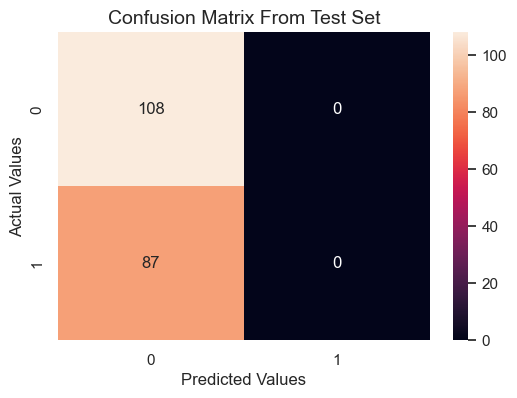

In [63]:
# confusion matrix with default parameter
cfm(y1_test, y_pred)

#### Hyperparameter Tuning

In [64]:
# hyperparamater tuning
from sklearn.model_selection import GridSearchCV

# List of hyperparameter
penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.002, 0.003, 75)]
solver = ['newton-cg', 'lbfgs','liblinear', 'sag', 'saga']

hyperparameters = dict(penalty = penalty, C = C, solver = solver)

logreg1 = LogisticRegression(random_state = 42)
logreg_tuned1 = GridSearchCV(logreg1, hyperparameters, cv = 5, scoring = 'accuracy')
logreg_tuned1.fit(X1_train, y1_train)

y_pred_train = logreg_tuned1.predict(X1_train)
y_pred = logreg_tuned1.predict(X1_test)

eval_classification(logreg_tuned1, y_pred_train, y_pred, y1_train, y1_test)

Accuracy (Test Set): 0.95
Accuracy (Train Set): 0.91
Recall (Test Set): 0.91
Recall (Train Set): 0.87
Precision (Test Set): 0.98
Precision (Train Set): 0.94
F1 Score (Test Set): 0.94
F1 Score (Train Set): 0.91
AUC (Train Set): 0.91
AUC (Test Set): 0.94


In [65]:
show_best_hyperparameter(logreg_tuned1)

{'C': 0.002310810810810811, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [66]:
#Re-iteration with the best parameters after the absence of overfitting and underfitting
lr_tuned1 = LogisticRegression(random_state = 42,
                              C = 0.002310810810810811,
                              penalty = 'l2',
                              solver = 'newton-cg'
                              ).fit(X1_train, y1_train)
eval_classification(lr_tuned1, y_pred_train, y_pred, y1_train, y1_test)

Accuracy (Test Set): 0.95
Accuracy (Train Set): 0.91
Recall (Test Set): 0.91
Recall (Train Set): 0.87
Precision (Test Set): 0.98
Precision (Train Set): 0.94
F1 Score (Test Set): 0.94
F1 Score (Train Set): 0.91
AUC (Train Set): 0.91
AUC (Test Set): 0.94


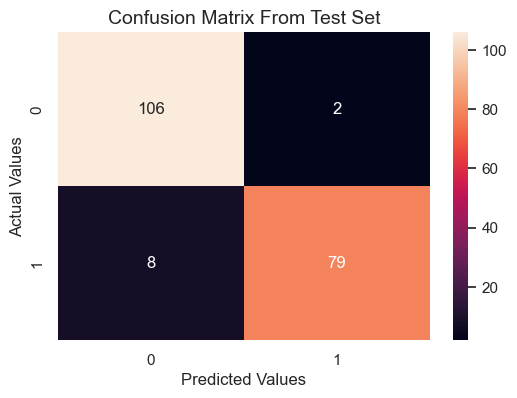

In [67]:
# confusion matrix : hyperparameter tuning
cfm(y1_test, y_pred)

### Decision Tree

In [68]:
# import library decision tree
from sklearn.tree import DecisionTreeClassifier

In [69]:
# default parameter
dt1 = DecisionTreeClassifier(random_state = 42)
dt1.fit(X1_train, y1_train)

y_pred_train = dt1.predict(X1_train)
y_pred = dt1.predict(X1_test)

# check model performance : default parameter
eval_classification(dt1, y_pred_train, y_pred, y1_train, y1_test)

Accuracy (Test Set): 0.93
Accuracy (Train Set): 1.00
Recall (Test Set): 0.92
Recall (Train Set): 1.00
Precision (Test Set): 0.92
Precision (Train Set): 1.00
F1 Score (Test Set): 0.92
F1 Score (Train Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 0.93


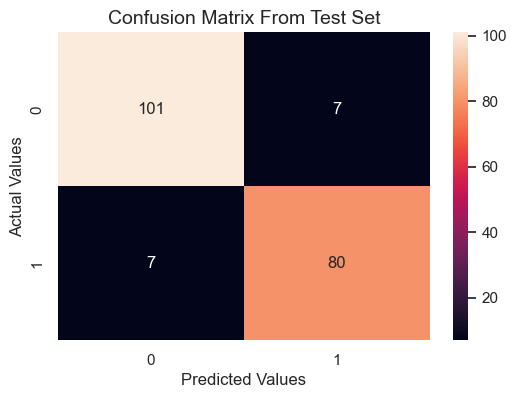

In [70]:
# confusion matrix : default parameter
cfm(y1_test,y_pred)

#### Hyperparameter Tuning

In [71]:
# hyperparamater tuning
from sklearn.model_selection import GridSearchCV

hyperparameters = dict(
                       criterion = ['entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 20, num = 20)],
                       min_samples_split = [int(x) for x in np.linspace(start = 1, stop = 50, num = 5)],
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 50, num = 5)],
                       max_features = ['auto'],
                       splitter = ['best'])

dt = DecisionTreeClassifier(random_state = 42)
dt_tuned1 = GridSearchCV(dt, hyperparameters, cv = 5, scoring = 'accuracy')
dt_tuned1.fit(X1_train, y1_train)

y_pred_train = dt_tuned1.predict(X1_train)
y_pred = dt_tuned1.predict(X1_test)

eval_classification(dt_tuned1, y_pred_train, y_pred, y1_train, y1_test)

Accuracy (Test Set): 0.91
Accuracy (Train Set): 0.96
Recall (Test Set): 0.90
Recall (Train Set): 0.96
Precision (Test Set): 0.90
Precision (Train Set): 0.96
F1 Score (Test Set): 0.90
F1 Score (Train Set): 0.96
AUC (Train Set): 0.96
AUC (Test Set): 0.91


In [72]:
show_best_hyperparameter(dt_tuned1)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 25, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [73]:
#Re-iteration with the best parameters after the absence of overfitting and underfitting
dt_tuned1 = DecisionTreeClassifier(criterion = 'entropy',
                                   max_depth = 8,
                                   min_samples_split = 25,
                                   min_samples_leaf = 1,
                                   max_features = 'auto',
                                   splitter = 'best').fit(X1_train, y1_train)

eval_classification(dt_tuned1, y_pred_train, y_pred, y1_train, y1_test)

Accuracy (Test Set): 0.91
Accuracy (Train Set): 0.96
Recall (Test Set): 0.90
Recall (Train Set): 0.96
Precision (Test Set): 0.90
Precision (Train Set): 0.96
F1 Score (Test Set): 0.90
F1 Score (Train Set): 0.96
AUC (Train Set): 0.96
AUC (Test Set): 0.91


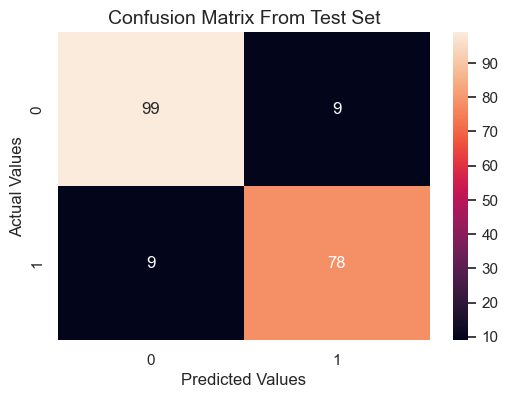

In [74]:
# confusion matrix : hyperparameter tuning
cfm(y1_test ,y_pred)

### Random Forest

In [75]:
# import library random forest
from sklearn.ensemble import RandomForestClassifier

In [76]:
# default parameter
rf1 = RandomForestClassifier(random_state = 42)
rf1.fit(X1_train, y1_train)

y_pred_train = rf1.predict(X1_train)
y_pred = rf1.predict(X1_test)

# check model performance : default parameter
eval_classification(rf1, y_pred_train, y_pred, y1_train, y1_test)

Accuracy (Test Set): 0.95
Accuracy (Train Set): 1.00
Recall (Test Set): 0.94
Recall (Train Set): 1.00
Precision (Test Set): 0.94
Precision (Train Set): 1.00
F1 Score (Test Set): 0.94
F1 Score (Train Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 0.95


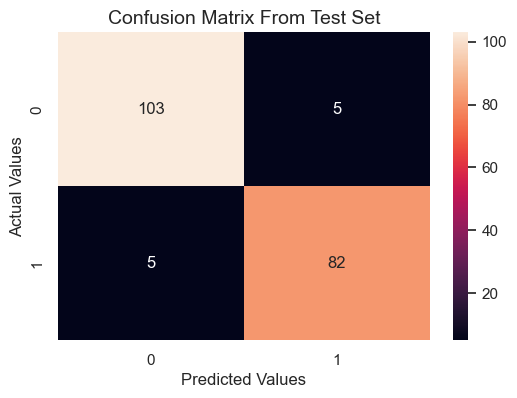

In [77]:
# confusion matrix : default parameter
cfm(y1_test,y_pred)

#### Hyperparameter Tuning

In [78]:
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List of hyperparameters
hyperparameters = dict(
                       n_estimators = [100, 110],
                       bootstrap = [True],
                       criterion = ['gini', 'entropy'],
                       max_depth = [int(x) for x in np.linspace(2, 20, num = 10)],
                       min_samples_split = [int(x) for x in np.linspace(start = 3, stop = 15, num = 5)],
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 5, num = 5)],
                       max_features = ['auto','sqrt','log2'],
                       n_jobs = [-1])

rf = RandomForestClassifier(random_state = 42)
rf_tuned1 = RandomizedSearchCV(rf, hyperparameters, cv = 5, random_state=42, scoring = 'accuracy')
rf_tuned1.fit(X1_train,y1_train)

y_pred_train = rf_tuned1.predict(X1_train)
y_pred = rf_tuned1.predict(X1_test)

eval_classification(rf_tuned1, y_pred_train, y_pred, y1_train, y1_test)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 0.99
Recall (Test Set): 0.94
Recall (Train Set): 0.99
Precision (Test Set): 0.93
Precision (Train Set): 0.99
F1 Score (Test Set): 0.94
F1 Score (Train Set): 0.99
AUC (Train Set): 0.99
AUC (Test Set): 0.94


In [79]:
show_best_hyperparameter(rf_tuned1)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 12, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [80]:
#Re-iteration with the best parameters after the absence of overfitting and underfitting
rf_tuned1 = RandomForestClassifier(n_estimators = 100,
                                   bootstrap = True,
                                   criterion = 'gini',
                                   max_depth = 8,
                                   min_samples_split = 12,
                                   min_samples_leaf = 2,
                                   max_features = 'auto',
                                   n_jobs = -1).fit(X1_train, y1_train)

eval_classification(rf_tuned1, y_pred_train, y_pred, y1_train, y1_test)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 0.99
Recall (Test Set): 0.94
Recall (Train Set): 0.99
Precision (Test Set): 0.93
Precision (Train Set): 0.99
F1 Score (Test Set): 0.94
F1 Score (Train Set): 0.99
AUC (Train Set): 0.99
AUC (Test Set): 0.94


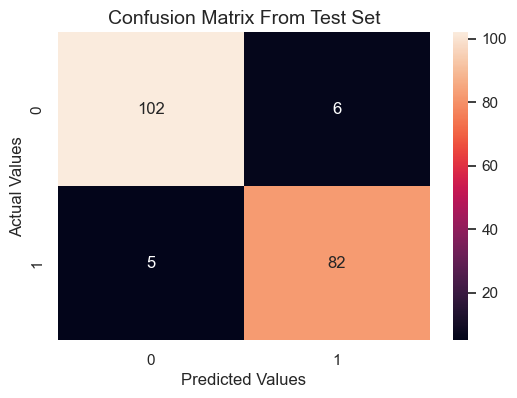

In [81]:
# confusion matrix : hyperparameter tuning
cfm(y1_test, y_pred)

### K-Nearest Neighbors (KNN)

In [82]:
# import library k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

In [83]:
# default parameter
knn1 = KNeighborsClassifier()
knn1.fit(X1_train, y1_train)

y_pred_train = knn1.predict(X1_train)
y_pred = knn1.predict(X1_test)

# check model performance : default parameter
eval_classification(knn1, y_pred_train, y_pred, y1_train, y1_test)

Accuracy (Test Set): 0.68
Accuracy (Train Set): 0.76
Recall (Test Set): 0.66
Recall (Train Set): 0.73
Precision (Test Set): 0.64
Precision (Train Set): 0.78
F1 Score (Test Set): 0.65
F1 Score (Train Set): 0.75
AUC (Train Set): 0.76
AUC (Test Set): 0.68


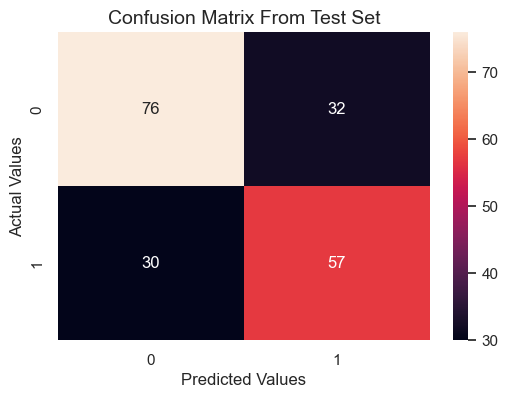

In [84]:
# confusion matrix : default parameter
cfm(y1_test,y_pred)

#### Hyperparameter Tuning

In [85]:
# hyperparamater tuning
from sklearn.model_selection import GridSearchCV

n_neighbors = list(range(1,30))
weights = ['uniform']
p = [1, 2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

hyperparameters = dict(n_neighbors = n_neighbors,
                       weights = weights,
                       p = p,
                       algorithm = algorithm)

knn = KNeighborsClassifier()
knn_tuned1 = GridSearchCV(knn, hyperparameters, cv = 5, scoring = 'accuracy')
knn_tuned1.fit(X1_train, y1_train)

y_pred_train = knn_tuned1.predict(X1_train)
y_pred = knn_tuned1.predict(X1_test)

eval_classification(knn_tuned1, y_pred_train, y_pred, y1_train, y1_test)

Accuracy (Test Set): 0.73
Accuracy (Train Set): 0.70
Recall (Test Set): 0.59
Recall (Train Set): 0.57
Precision (Test Set): 0.75
Precision (Train Set): 0.78
F1 Score (Test Set): 0.66
F1 Score (Train Set): 0.66
AUC (Train Set): 0.70
AUC (Test Set): 0.71


In [86]:
show_best_hyperparameter(knn_tuned1)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 16, 'p': 1, 'weights': 'uniform'}


In [87]:
#Re-iteration with the best parameters after the absence of overfitting and underfitting
knn_tuned1 = KNeighborsClassifier(n_neighbors = 16,
                                 p = 1,
                                 leaf_size = 30,
                                 weights = 'uniform',
                                 algorithm = 'auto').fit(X1_train, y1_train)
eval_classification(knn_tuned1, y_pred_train, y_pred, y1_train, y1_test)

Accuracy (Test Set): 0.73
Accuracy (Train Set): 0.70
Recall (Test Set): 0.59
Recall (Train Set): 0.57
Precision (Test Set): 0.75
Precision (Train Set): 0.78
F1 Score (Test Set): 0.66
F1 Score (Train Set): 0.66
AUC (Train Set): 0.70
AUC (Test Set): 0.71


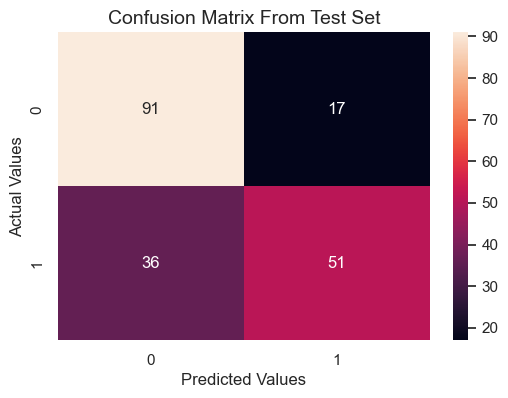

In [88]:
# confusion matrix : hyperparameter tuning
cfm(y1_test,y_pred)

### Gradient Boosting

In [89]:
# import library Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
# default parameter
grad1 = GradientBoostingClassifier(random_state = 42)
grad1.fit(X1_train, y1_train)

y_pred_train = grad1.predict(X1_train)
y_pred = grad1.predict(X1_test)

# check model performance: default parameter
eval_classification(grad1, y_pred_train, y_pred, y1_train, y1_test)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 1.00
Recall (Test Set): 0.93
Recall (Train Set): 1.00
Precision (Test Set): 0.94
Precision (Train Set): 1.00
F1 Score (Test Set): 0.94
F1 Score (Train Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 0.94


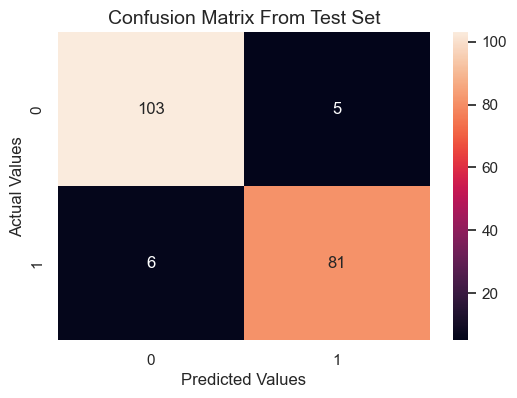

In [91]:
# confusion matrix : default parameter
cfm(y1_test, y_pred)

#### Hyperparameter Tuning

In [92]:
# List of hyperparameters
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(10, 50, num = 10)],
                       criterion = ['friedman_mse', 'squared_error'],
                       max_depth = [2, 3],
                       min_samples_split = [1, 2, 3],
                       min_samples_leaf = [1, 2, 3],
                       max_features = ['sqrt'],
                       loss = ['exponential'])

grad = GradientBoostingClassifier(random_state = 42)
grad_tuned1 = GridSearchCV(grad, hyperparameters, cv = 5, scoring = 'accuracy')
grad_tuned1.fit(X1_train, y1_train)

y_pred_train = grad_tuned1.predict(X1_train)
y_pred = grad_tuned1.predict(X1_test)

# check model performance: default parameter
eval_classification(grad_tuned1, y_pred_train, y_pred, y1_train, y1_test)

Accuracy (Test Set): 0.96
Accuracy (Train Set): 0.99
Recall (Test Set): 0.95
Recall (Train Set): 0.98
Precision (Test Set): 0.95
Precision (Train Set): 0.99
F1 Score (Test Set): 0.95
F1 Score (Train Set): 0.99
AUC (Train Set): 0.99
AUC (Test Set): 0.96


In [93]:
show_best_hyperparameter(grad_tuned1)

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [94]:
#Re-iteration with the best parameters after the absence of overfitting and underfitting
grad_tuned1 = GradientBoostingClassifier(n_estimators = 41,
                                   criterion = 'friedman_mse',
                                   max_depth = 3,
                                   min_samples_split = 2,
                                   min_samples_leaf = 2,
                                   max_features = 'sqrt',
                                   loss = 'exponential').fit(X1_train, y1_train)

eval_classification(grad_tuned1, y_pred_train, y_pred, y1_train, y1_test)

Accuracy (Test Set): 0.96
Accuracy (Train Set): 0.99
Recall (Test Set): 0.95
Recall (Train Set): 0.98
Precision (Test Set): 0.95
Precision (Train Set): 0.99
F1 Score (Test Set): 0.95
F1 Score (Train Set): 0.99
AUC (Train Set): 0.99
AUC (Test Set): 0.96


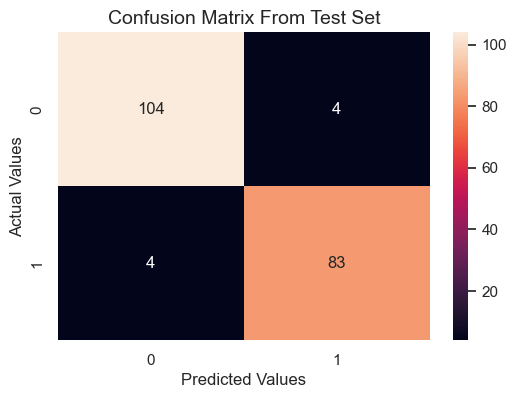

In [95]:
# confusion matrix : default parameter
cfm(y1_test, y_pred)

## (2) After Standardization

### Logistic Regression

In [96]:
# import library logistic regression
from sklearn.linear_model import LogisticRegression

In [97]:
# default parameter
logreg2 = LogisticRegression(random_state = 42)
logreg2.fit(X2_train, y2_train)

y_pred_train = logreg2.predict(X2_train)
y_pred = logreg2.predict(X2_test)

# check model performance : default parameter
eval_classification(logreg2, y_pred_train, y_pred, y2_train, y2_test)

Accuracy (Test Set): 0.96
Accuracy (Train Set): 0.97
Recall (Test Set): 0.94
Recall (Train Set): 0.97
Precision (Test Set): 0.98
Precision (Train Set): 0.98
F1 Score (Test Set): 0.96
F1 Score (Train Set): 0.97
AUC (Train Set): 0.97
AUC (Test Set): 0.96


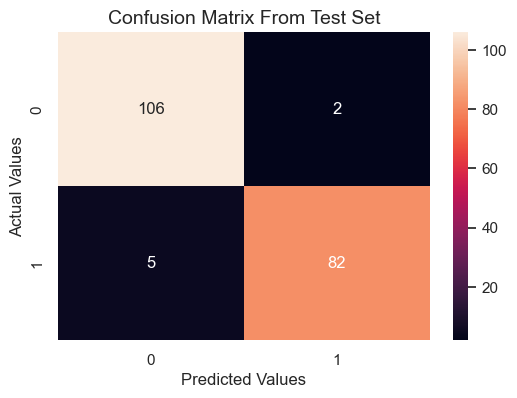

In [98]:
# confusion matrix with default parameter
cfm(y2_test, y_pred)

#### Hyperparameter Tuning

In [99]:
# hyperparamater tuning
from sklearn.model_selection import GridSearchCV

# List of hyperparameter
penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.002, 0.003, 75)]
solver = ['newton-cg', 'lbfgs','liblinear', 'sag', 'saga']

hyperparameters = dict(penalty = penalty, C = C, solver = solver)

logreg2 = LogisticRegression(random_state = 42)
logreg_tuned2 = GridSearchCV(logreg2, hyperparameters, cv = 5, scoring = 'accuracy')
logreg_tuned2.fit(X2_train, y2_train)

y_pred_train = logreg_tuned2.predict(X2_train)
y_pred = logreg_tuned2.predict(X2_test)

eval_classification(logreg_tuned2, y_pred_train, y_pred, y2_train, y2_test)

Accuracy (Test Set): 0.96
Accuracy (Train Set): 0.96
Recall (Test Set): 0.93
Recall (Train Set): 0.93
Precision (Test Set): 0.99
Precision (Train Set): 0.99
F1 Score (Test Set): 0.96
F1 Score (Train Set): 0.96
AUC (Train Set): 0.96
AUC (Test Set): 0.96


In [100]:
show_best_hyperparameter(logreg_tuned2)

{'C': 0.002, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [101]:
#Re-iteration with the best parameters after the absence of overfitting and underfitting
lr_tuned2 = LogisticRegression(random_state = 42,
                              C = 0.002,
                              penalty = 'l2',
                              solver = 'newton-cg'
                              ).fit(X2_train, y2_train)
eval_classification(lr_tuned2, y_pred_train, y_pred, y2_train, y2_test)

Accuracy (Test Set): 0.96
Accuracy (Train Set): 0.96
Recall (Test Set): 0.93
Recall (Train Set): 0.93
Precision (Test Set): 0.99
Precision (Train Set): 0.99
F1 Score (Test Set): 0.96
F1 Score (Train Set): 0.96
AUC (Train Set): 0.96
AUC (Test Set): 0.96


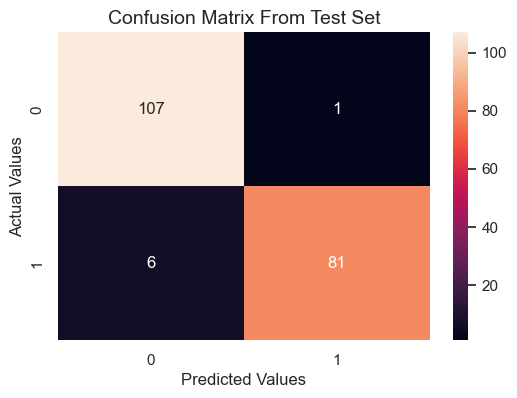

In [102]:
# confusion matrix : hyperparameter tuning
cfm(y2_test, y_pred)

### Decision Tree

In [103]:
# import library decision tree
from sklearn.tree import DecisionTreeClassifier

In [104]:
# default parameter
dt2 = DecisionTreeClassifier(random_state = 42)
dt2.fit(X2_train, y2_train)

y_pred_train = dt2.predict(X2_train)
y_pred = dt2.predict(X2_test)

# check model performance : default parameter
eval_classification(dt2, y_pred_train, y_pred, y2_train, y2_test)

Accuracy (Test Set): 0.93
Accuracy (Train Set): 1.00
Recall (Test Set): 0.92
Recall (Train Set): 1.00
Precision (Test Set): 0.93
Precision (Train Set): 1.00
F1 Score (Test Set): 0.92
F1 Score (Train Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 0.93


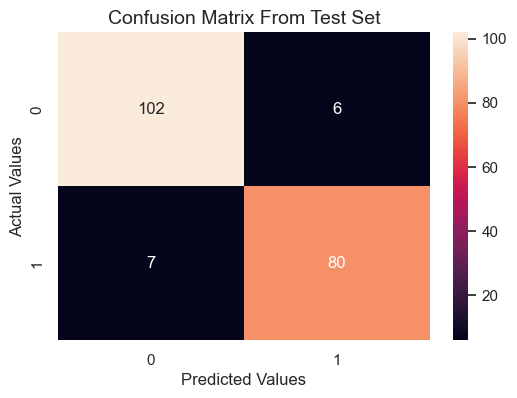

In [105]:
# confusion matrix : default parameter
cfm(y2_test,y_pred)

#### Hyperparameter Tuning

In [106]:
# hyperparamater tuning
from sklearn.model_selection import GridSearchCV

hyperparameters = dict(
                       criterion = ['entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 20, num = 20)],
                       min_samples_split = [int(x) for x in np.linspace(start = 1, stop = 50, num = 5)],
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 50, num = 5)],
                       max_features = ['auto'],
                       splitter = ['best'])

dt = DecisionTreeClassifier(random_state = 42)
dt_tuned2 = GridSearchCV(dt, hyperparameters, cv = 5, scoring = 'accuracy')
dt_tuned2.fit(X2_train, y2_train)

y_pred_train = dt_tuned2.predict(X2_train)
y_pred = dt_tuned2.predict(X2_test)

eval_classification(dt_tuned2, y_pred_train, y_pred, y2_train, y2_test)

Accuracy (Test Set): 0.91
Accuracy (Train Set): 0.96
Recall (Test Set): 0.90
Recall (Train Set): 0.96
Precision (Test Set): 0.90
Precision (Train Set): 0.96
F1 Score (Test Set): 0.90
F1 Score (Train Set): 0.96
AUC (Train Set): 0.96
AUC (Test Set): 0.91


In [107]:
show_best_hyperparameter(dt_tuned2)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 25, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [108]:
#Re-iteration with the best parameters after the absence of overfitting and underfitting
dt_tuned2 = DecisionTreeClassifier(criterion = 'entropy',
                                   max_depth = 10,
                                   min_samples_split = 25,
                                   min_samples_leaf = 1,
                                   max_features = 'auto',
                                   splitter = 'best').fit(X2_train, y2_train)

eval_classification(dt_tuned2, y_pred_train, y_pred, y2_train, y2_test)

Accuracy (Test Set): 0.91
Accuracy (Train Set): 0.96
Recall (Test Set): 0.90
Recall (Train Set): 0.96
Precision (Test Set): 0.90
Precision (Train Set): 0.96
F1 Score (Test Set): 0.90
F1 Score (Train Set): 0.96
AUC (Train Set): 0.96
AUC (Test Set): 0.91


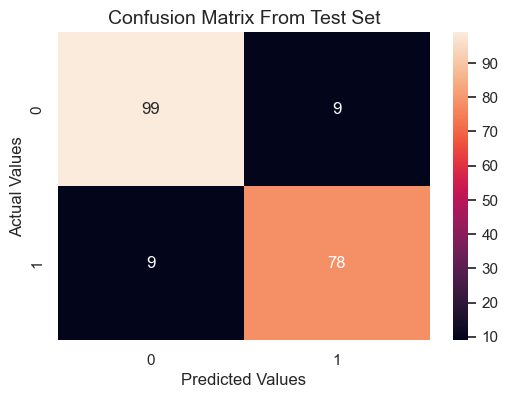

In [109]:
# confusion matrix : hyperparameter tuning
cfm(y2_test ,y_pred)

### Random Forest

In [110]:
# import library random forest
from sklearn.ensemble import RandomForestClassifier

In [111]:
# default parameter
rf2 = RandomForestClassifier(random_state = 42)
rf2.fit(X2_train, y2_train)

y_pred_train = rf2.predict(X2_train)
y_pred = rf2.predict(X2_test)

# check model performance : default parameter
eval_classification(rf2, y_pred_train, y_pred, y2_train, y2_test)

Accuracy (Test Set): 0.95
Accuracy (Train Set): 1.00
Recall (Test Set): 0.94
Recall (Train Set): 1.00
Precision (Test Set): 0.95
Precision (Train Set): 1.00
F1 Score (Test Set): 0.95
F1 Score (Train Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 0.95


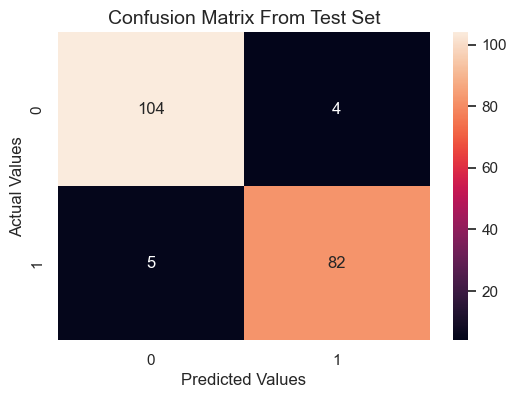

In [112]:
# confusion matrix : default parameter
cfm(y2_test,y_pred)

#### Hyperparameter Tuning

In [113]:
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List of hyperparameters
hyperparameters = dict(
                       n_estimators = [100, 110],
                       bootstrap = [True],
                       criterion = ['gini', 'entropy'],
                       max_depth = [int(x) for x in np.linspace(2, 20, num = 10)],
                       min_samples_split = [int(x) for x in np.linspace(start = 3, stop = 15, num = 5)],
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 5, num = 5)],
                       max_features = ['auto','sqrt','log2'],
                       n_jobs = [-1])

rf = RandomForestClassifier(random_state = 42)
rf_tuned2 = RandomizedSearchCV(rf, hyperparameters, cv = 5, random_state=42, scoring = 'accuracy')
rf_tuned2.fit(X2_train,y2_train)

y_pred_train = rf_tuned2.predict(X2_train)
y_pred = rf_tuned2.predict(X2_test)

eval_classification(rf_tuned2, y_pred_train, y_pred, y2_train, y2_test)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 0.99
Recall (Test Set): 0.94
Recall (Train Set): 0.99
Precision (Test Set): 0.93
Precision (Train Set): 0.99
F1 Score (Test Set): 0.94
F1 Score (Train Set): 0.99
AUC (Train Set): 0.99
AUC (Test Set): 0.94


In [114]:
show_best_hyperparameter(rf_tuned2)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 12, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [115]:
#Re-iteration with the best parameters after the absence of overfitting and underfitting
rf_tuned2 = RandomForestClassifier(n_estimators = 100,
                                   bootstrap = True,
                                   criterion = 'gini',
                                   max_depth = 8,
                                   min_samples_split = 12,
                                   min_samples_leaf = 2,
                                   max_features = 'auto',
                                   n_jobs = -1).fit(X2_train, y2_train)

eval_classification(rf_tuned2, y_pred_train, y_pred, y2_train, y2_test)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 0.99
Recall (Test Set): 0.94
Recall (Train Set): 0.99
Precision (Test Set): 0.93
Precision (Train Set): 0.99
F1 Score (Test Set): 0.94
F1 Score (Train Set): 0.99
AUC (Train Set): 0.99
AUC (Test Set): 0.94


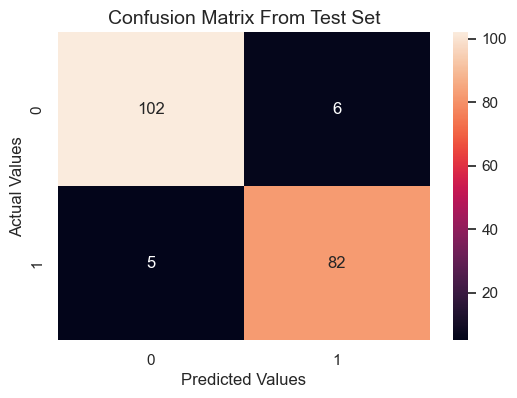

In [116]:
# confusion matrix : hyperparameter tuning
cfm(y2_test, y_pred)

### K-Nearest Neighbors (KNN)

In [117]:
# import library k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

In [118]:
# default parameter
knn2 = KNeighborsClassifier()
knn2.fit(X2_train, y2_train)

y_pred_train = knn2.predict(X2_train)
y_pred = knn2.predict(X2_test)

# check model performance : default parameter
eval_classification(knn2, y_pred_train, y_pred, y2_train, y2_test)

Accuracy (Test Set): 0.93
Accuracy (Train Set): 0.95
Recall (Test Set): 0.89
Recall (Train Set): 0.92
Precision (Test Set): 0.96
Precision (Train Set): 0.99
F1 Score (Test Set): 0.92
F1 Score (Train Set): 0.95
AUC (Train Set): 0.96
AUC (Test Set): 0.93


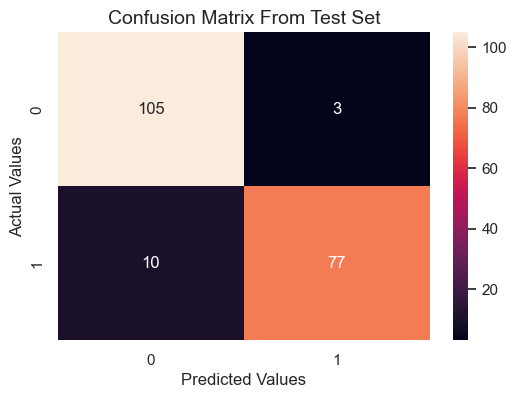

In [119]:
# confusion matrix : default parameter
cfm(y2_test,y_pred)

#### Hyperparameter Tuning

In [120]:
# hyperparamater tuning
from sklearn.model_selection import GridSearchCV

n_neighbors = list(range(1,30))
weights = ['uniform']
p = [1, 2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

hyperparameters = dict(n_neighbors = n_neighbors,
                       weights = weights,
                       p = p,
                       algorithm = algorithm)

knn = KNeighborsClassifier()
knn_tuned2 = GridSearchCV(knn, hyperparameters, cv = 5, scoring = 'accuracy')
knn_tuned2.fit(X2_train, y2_train)

y_pred_train = knn_tuned2.predict(X2_train)
y_pred = knn_tuned2.predict(X2_test)

eval_classification(knn_tuned2, y_pred_train, y_pred, y2_train, y2_test)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 0.94
Recall (Test Set): 0.87
Recall (Train Set): 0.89
Precision (Test Set): 1.00
Precision (Train Set): 0.99
F1 Score (Test Set): 0.93
F1 Score (Train Set): 0.94
AUC (Train Set): 0.94
AUC (Test Set): 0.94


In [121]:
show_best_hyperparameter(knn_tuned2)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}


In [122]:
#Re-iteration with the best parameters after the absence of overfitting and underfitting
knn_tuned2 = KNeighborsClassifier(n_neighbors = 15,
                                 p = 2,
                                 leaf_size = 30,
                                 weights = 'uniform',
                                 algorithm = 'auto').fit(X2_train, y2_train)
eval_classification(knn_tuned2, y_pred_train, y_pred, y2_train, y2_test)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 0.94
Recall (Test Set): 0.87
Recall (Train Set): 0.89
Precision (Test Set): 1.00
Precision (Train Set): 0.99
F1 Score (Test Set): 0.93
F1 Score (Train Set): 0.94
AUC (Train Set): 0.94
AUC (Test Set): 0.94


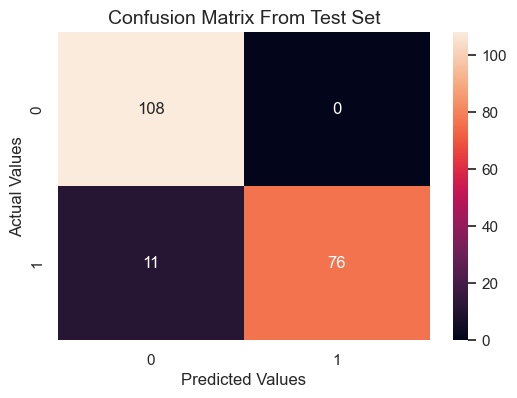

In [123]:
# confusion matrix : hyperparameter tuning
cfm(y2_test,y_pred)

### Gradient Boosting

In [124]:
# import library Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

In [125]:
# default parameter
grad2 = GradientBoostingClassifier(random_state = 42)
grad2.fit(X2_train, y2_train)

y_pred_train = grad2.predict(X2_train)
y_pred = grad2.predict(X2_test)

# check model performance: default parameter
eval_classification(grad2, y_pred_train, y_pred, y2_train, y2_test)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 1.00
Recall (Test Set): 0.93
Recall (Train Set): 1.00
Precision (Test Set): 0.94
Precision (Train Set): 1.00
F1 Score (Test Set): 0.94
F1 Score (Train Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 0.94


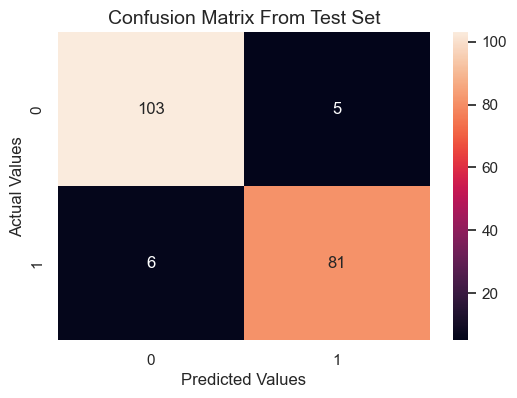

In [126]:
# confusion matrix : default parameter
cfm(y2_test, y_pred)

#### Hyperparameter Tuning

In [127]:
# List of hyperparameters
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(10, 50, num = 10)],
                       criterion = ['friedman_mse', 'squared_error'],
                       max_depth = [2, 3],
                       min_samples_split = [1, 2, 3],
                       min_samples_leaf = [1, 2, 3],
                       max_features = ['sqrt'],
                       loss = ['exponential'])

grad = GradientBoostingClassifier(random_state = 42)
grad_tuned2 = GridSearchCV(grad, hyperparameters, cv = 5, scoring = 'accuracy')
grad_tuned2.fit(X2_train, y2_train)

y_pred_train = grad_tuned2.predict(X2_train)
y_pred = grad_tuned2.predict(X2_test)

# check model performance: default parameter
eval_classification(grad_tuned2, y_pred_train, y_pred, y2_train, y2_test)

Accuracy (Test Set): 0.96
Accuracy (Train Set): 0.99
Recall (Test Set): 0.95
Recall (Train Set): 0.98
Precision (Test Set): 0.95
Precision (Train Set): 0.99
F1 Score (Test Set): 0.95
F1 Score (Train Set): 0.99
AUC (Train Set): 0.99
AUC (Test Set): 0.96


In [128]:
show_best_hyperparameter(grad_tuned2)

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [129]:
#Re-iteration with the best parameters after the absence of overfitting and underfitting
grad_tuned2 = GradientBoostingClassifier(n_estimators = 50,
                                   criterion = 'friedman_mse',
                                   max_depth = 3,
                                   min_samples_split = 3,
                                   min_samples_leaf = 1,
                                   max_features = 'sqrt',
                                   loss = 'exponential').fit(X2_train, y2_train)

eval_classification(grad_tuned2, y_pred_train, y_pred, y2_train, y2_test)

Accuracy (Test Set): 0.96
Accuracy (Train Set): 0.99
Recall (Test Set): 0.95
Recall (Train Set): 0.98
Precision (Test Set): 0.95
Precision (Train Set): 0.99
F1 Score (Test Set): 0.95
F1 Score (Train Set): 0.99
AUC (Train Set): 0.99
AUC (Test Set): 0.96


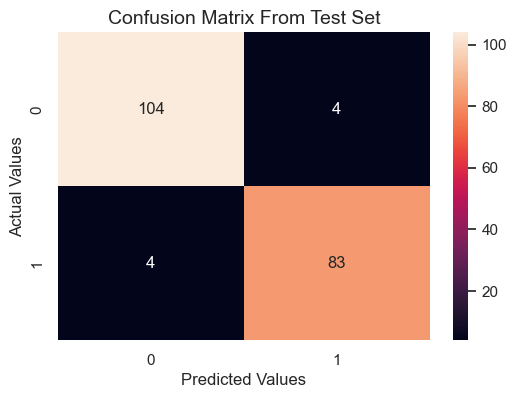

In [130]:
# confusion matrix : default parameter
cfm(y2_test, y_pred)

## Model Comparison

> The main metric used is `Accuracy` where both labels have the same importance and the secondary matrix is `Recall`.

### Experiment 1 (Before)

In [131]:
# define model
models_dict = {}
models_dict["Logistic Regression"] = logreg_tuned1
models_dict["KNearest Neighbors"] = knn_tuned1
models_dict["Decision Tree"] = dt_tuned1
models_dict["Random Forest"] = rf_tuned1
models_dict["Gradient Boosting"] = grad_tuned1

In [132]:
for model_name, model in models_dict.items():
    print(f"Training model {model_name}")
    %time model.fit(X1_train,y1_train)

Training model Logistic Regression
CPU times: total: 2min 13s
Wall time: 2min 14s
Training model KNearest Neighbors
CPU times: total: 0 ns
Wall time: 2.12 ms
Training model Decision Tree
CPU times: total: 15.6 ms
Wall time: 1.87 ms
Training model Random Forest
CPU times: total: 297 ms
Wall time: 207 ms
Training model Gradient Boosting
CPU times: total: 46.9 ms
Wall time: 52.1 ms


In [133]:
# create list to store prediciton results
import time
train_prediction_results = []
test_prediction_results = []

train_val_time_elapsed = []

for model_name, model in models_dict.items():
    tstart = time.time()
    print(f"Model on {model_name}")
    # predict
    model_pred_test = model.predict(X1_test)
    test_prediction_results.append(model_pred_test)

    # append result to list
    model_pred_train = model.predict(X1_train)
    train_prediction_results.append(model_pred_train)

    tfinish = time.time()
    time_elapsed = round((tfinish - tstart)*1000, 2)
    train_val_time_elapsed.append(time_elapsed)
    print(f"elapsed time: {time_elapsed} ms")

Model on Logistic Regression
elapsed time: 3.97 ms
Model on KNearest Neighbors
elapsed time: 226.12 ms
Model on Decision Tree
elapsed time: 1.99 ms
Model on Random Forest
elapsed time: 64.63 ms
Model on Gradient Boosting
elapsed time: 3.99 ms


In [134]:
# create list to append evaluation metrics train
precision_train = []
recall_train = []
accuracy_train = []
confusion_m_train = []

# calculate error train
for y_pred in train_prediction_results:
    precision_train.append(precision_score(y1_train, y_pred))
    recall_train.append(recall_score(y1_train, y_pred))
    accuracy_train.append(accuracy_score(y1_train, y_pred))
    confusion_m_train.append(confusion_matrix(y1_train, y_pred))

# create list to append evaluation metrics train
precision_test = []
recall_test = []
accuracy_test = []
confusion_m_test = []

# calculate error train
for y_pred in test_prediction_results:
    precision_test.append(precision_score(y1_test, y_pred))
    recall_test.append(recall_score(y1_test, y_pred))
    accuracy_test.append(accuracy_score(y1_test, y_pred))
    confusion_m_test.append(confusion_matrix(y1_test, y_pred))
models_name = list(models_dict.keys())

# create dataframe for model performances
eval_dict = {
    'model':models_dict.keys(),
    'Recall_test': recall_test,
    'Recall_train': recall_train,
    'Accuracy_test': accuracy_test,
    'Accuracy_train': accuracy_train,
    'Time_Elapsed': train_val_time_elapsed
}
df_results1 = pd.DataFrame(data = eval_dict)
df_results1 = df_results1.set_index("model")
df_results1.sort_values(['Recall_test', 'Recall_train', 'Accuracy_test','Accuracy_train'], ascending = False)
df_results1.style.format(precision=3).background_gradient(cmap='Reds')

,Recall_test,Recall_train,Accuracy_test,Accuracy_train,Time_Elapsed
model,,,,,
Logistic Regression,0.908,0.874,0.949,0.907,3.970
KNearest Neighbors,0.586,0.574,0.728,0.700,226.120
Decision Tree,0.931,0.957,0.944,0.955,1.990
Random Forest,0.943,0.987,0.954,0.990,64.630
Gradient Boosting,0.943,0.977,0.954,0.985,3.990


**Observations:**

- Almost all models don't have wide gaps between train and test.
- `KNN` has the most *Time_Elapsed* and lowest score.
- `Decision Tree` and `Gradient Boosting` have the lowest *Time_Elapsed*.
- `Random Forest` has the overall best score for both *Accuracy* and *Recall*. But a bit high in time required.

### Experiment 2 (After)

In [135]:
# define model
models_dict = {}
models_dict["Logistic Regression"] = lr_tuned2
models_dict["KNearest Neighbors"] = knn_tuned2
models_dict["Decision Tree"] = dt_tuned2
models_dict["Random Forest"] = rf_tuned2
models_dict["Gradient Boosting"] = grad_tuned2

In [136]:
for model_name, model in models_dict.items():
    print(f"Training model {model_name}")
    %time model.fit(X2_train, y2_train)

Training model Logistic Regression
CPU times: total: 0 ns
Wall time: 9.21 ms
Training model KNearest Neighbors
CPU times: total: 0 ns
Wall time: 2 ms
Training model Decision Tree
CPU times: total: 0 ns
Wall time: 3 ms
Training model Random Forest
CPU times: total: 344 ms
Wall time: 278 ms
Training model Gradient Boosting
CPU times: total: 62.5 ms
Wall time: 63.7 ms


In [137]:
# create list to store prediciton results
import time
train_prediction_results = []
test_prediction_results = []

train_val_time_elapsed = []

for model_name, model in models_dict.items():
    tstart = time.time()
    print(f"Model on {model_name}")
    # predict
    model_pred_test = model.predict(X2_test)
    test_prediction_results.append(model_pred_test)

    # append result to list
    model_pred_train = model.predict(X2_train)
    train_prediction_results.append(model_pred_train)

    tfinish = time.time()
    time_elapsed = round((tfinish - tstart)*1000, 2)
    train_val_time_elapsed.append(time_elapsed)
    print(f"elapsed time: {time_elapsed} ms")

Model on Logistic Regression
elapsed time: 3.99 ms
Model on KNearest Neighbors
elapsed time: 278.87 ms
Model on Decision Tree
elapsed time: 2.99 ms
Model on Random Forest
elapsed time: 61.84 ms
Model on Gradient Boosting
elapsed time: 3.99 ms


In [138]:
# create list to append evaluation metrics train
precision_train = []
recall_train = []
accuracy_train = []
confusion_m_train = []

# calculate error train
for y_pred in train_prediction_results:
    precision_train.append(precision_score(y2_train, y_pred))
    recall_train.append(recall_score(y2_train, y_pred))
    accuracy_train.append(accuracy_score(y2_train, y_pred))
    confusion_m_train.append(confusion_matrix(y2_train, y_pred))

# create list to append evaluation metrics train
precision_test = []
recall_test = []
accuracy_test = []
confusion_m_test = []

# calculate error train
for y_pred in test_prediction_results:
    precision_test.append(precision_score(y2_test, y_pred))
    recall_test.append(recall_score(y2_test, y_pred))
    accuracy_test.append(accuracy_score(y2_test, y_pred))
    confusion_m_test.append(confusion_matrix(y2_test, y_pred))
models_name = list(models_dict.keys())

# create dataframe for model performances
eval_dict = {
    'model':models_dict.keys(),
    'Recall_test': recall_test,
    'Recall_train': recall_train,
    'Accuracy_test': accuracy_test,
    'Accuracy_train': accuracy_train,
    'Time_Elapsed': train_val_time_elapsed
}
df_results2 = pd.DataFrame(data = eval_dict)
df_results2 = df_results2.set_index("model")
df_results2.sort_values(['Recall_test', 'Recall_train','Accuracy_test','Accuracy_train'], ascending = False)
df_results2.style.format(precision=3).background_gradient(cmap='Blues')

,Recall_test,Recall_train,Accuracy_test,Accuracy_train,Time_Elapsed
model,,,,,
Logistic Regression,0.931,0.935,0.964,0.963,3.990
KNearest Neighbors,0.874,0.889,0.944,0.940,278.870
Decision Tree,0.931,0.960,0.949,0.968,2.990
Random Forest,0.943,0.982,0.949,0.986,61.840
Gradient Boosting,0.954,0.982,0.964,0.986,3.990


**Observations:**

- `KNN` has the highest number of *Time Elapsed*.
- `Random Forest` has the best score in *Recall*.
- `Gradient Boosting` has the slight better score in *Accuracy*.
- `Logistic Regression`, `Decision Tree`, and `Gradient Boosting` has similar *Time Elapsed* score to each other and the top 3 fastest time required.

### Conclusion

> By considering both *Recall*, *Accuracy*, and *Time_Elapsed* score. `Gradient Boosting` with Standardization / Normalization is chosen for decent score and fast time required. 

## Selected Model

In [139]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X2_test.columns)
    ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(6, 8))
    ax.invert_yaxis()
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [140]:
best_model = grad_tuned2
best_model_name = "Standardized Gradient Boosting"

### Standardized Gradient Boosting

In [141]:
from sklearn.ensemble import GradientBoostingClassifier

# List of hyperparameters
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(10, 50, num = 10)],
                       criterion = ['friedman_mse', 'squared_error'],
                       max_depth = [2, 3],
                       min_samples_split = [1, 2, 3],
                       min_samples_leaf = [1, 2, 3],
                       max_features = ['sqrt'],
                       loss = ['exponential'])

grad = GradientBoostingClassifier(random_state = 42)
grad_tuned2 = GridSearchCV(grad, hyperparameters, cv = 5, scoring = 'accuracy')
grad_tuned2.fit(X2_train, y2_train)

y_pred_train = grad_tuned2.predict(X2_train)
y_pred = grad_tuned2.predict(X2_test)

# check model performance: default parameter
eval_classification(grad_tuned2, y_pred_train, y_pred, y2_train, y2_test)

Accuracy (Test Set): 0.96
Accuracy (Train Set): 0.99
Recall (Test Set): 0.95
Recall (Train Set): 0.98
Precision (Test Set): 0.95
Precision (Train Set): 0.99
F1 Score (Test Set): 0.95
F1 Score (Train Set): 0.99
AUC (Train Set): 0.99
AUC (Test Set): 0.96


In [142]:
show_best_hyperparameter(grad_tuned2.best_estimator_, hyperparameters)

Best n_estimators: 50
Best criterion: friedman_mse
Best max_depth: 3
Best min_samples_split: 3
Best min_samples_leaf: 1
Best max_features: sqrt
Best loss: exponential


In [143]:
#Re-iteration with the best parameters after the absence of overfitting and underfitting
grad_best2 = GradientBoostingClassifier(n_estimators = 50,
                                   criterion = 'friedman_mse',
                                   max_depth = 3,
                                   min_samples_split = 3,
                                   min_samples_leaf = 1,
                                   max_features = 'sqrt',
                                   loss = 'exponential').fit(X2_train, y2_train)

y_pred_train_best = grad_best2.predict(X2_train)
y_pred_best = grad_best2.predict(X2_test)

eval_classification(grad_best2, y_pred_train_best, y_pred_best, y2_train, y2_test)

Accuracy (Test Set): 0.96
Accuracy (Train Set): 0.99
Recall (Test Set): 0.95
Recall (Train Set): 0.98
Precision (Test Set): 0.95
Precision (Train Set): 0.99
F1 Score (Test Set): 0.95
F1 Score (Train Set): 0.99
AUC (Train Set): 0.99
AUC (Test Set): 0.96


#### Confusion Matrix

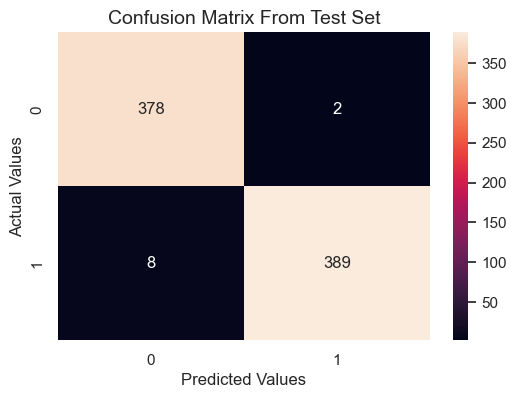

In [153]:
cfm(y2_train, y_pred_train)

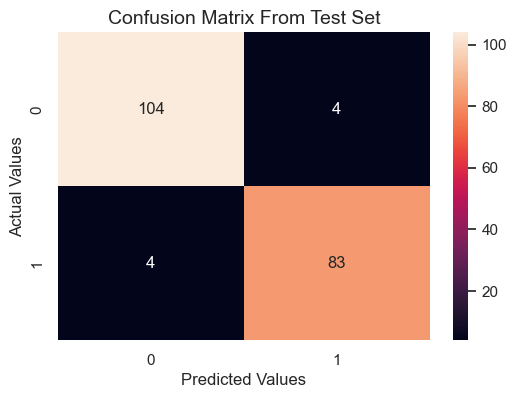

In [145]:
cfm(y2_test, y_pred)

**Observation:**

- From the confusion matrix above, from 87 actual values that clicked the ad, the algorithm correctly predicted 83 values and incorrectly predicted 4 values that clicked the ad. However, from 108 actual values that not clicked the ad, the algorithm correctly predicted 104 values and incorrectly predicted 4 values that not clicked the ad.

> As a result of the confusion matrix shown above for both data train and data test, Gradient Boosting was appropriate to apply to the existing dataset

## Feature Importance

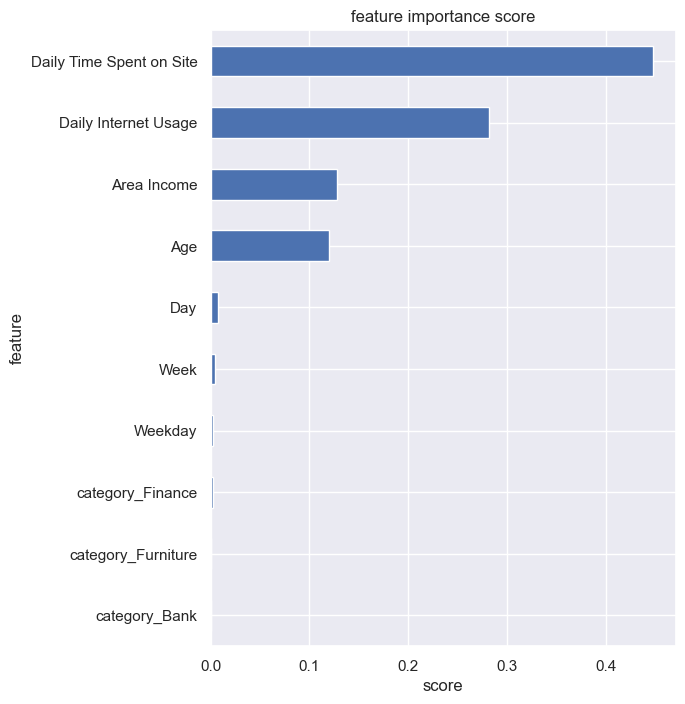

In [146]:
show_feature_importance(grad_tuned2)

**Observations:**

`Daily Time Spent on Site` is the most important feature of this model and following by `Daily Internet Usage`

## SHAP Observation

In [147]:
# # Create a SHAP explainer
# explainer = shap.Explainer(grad_best2)

# # Calculate the SHAP values for a single data point
# shap_values = explainer(X2_train)

# # Plot the SHAP values
# shap.plots.bar(shap_values)

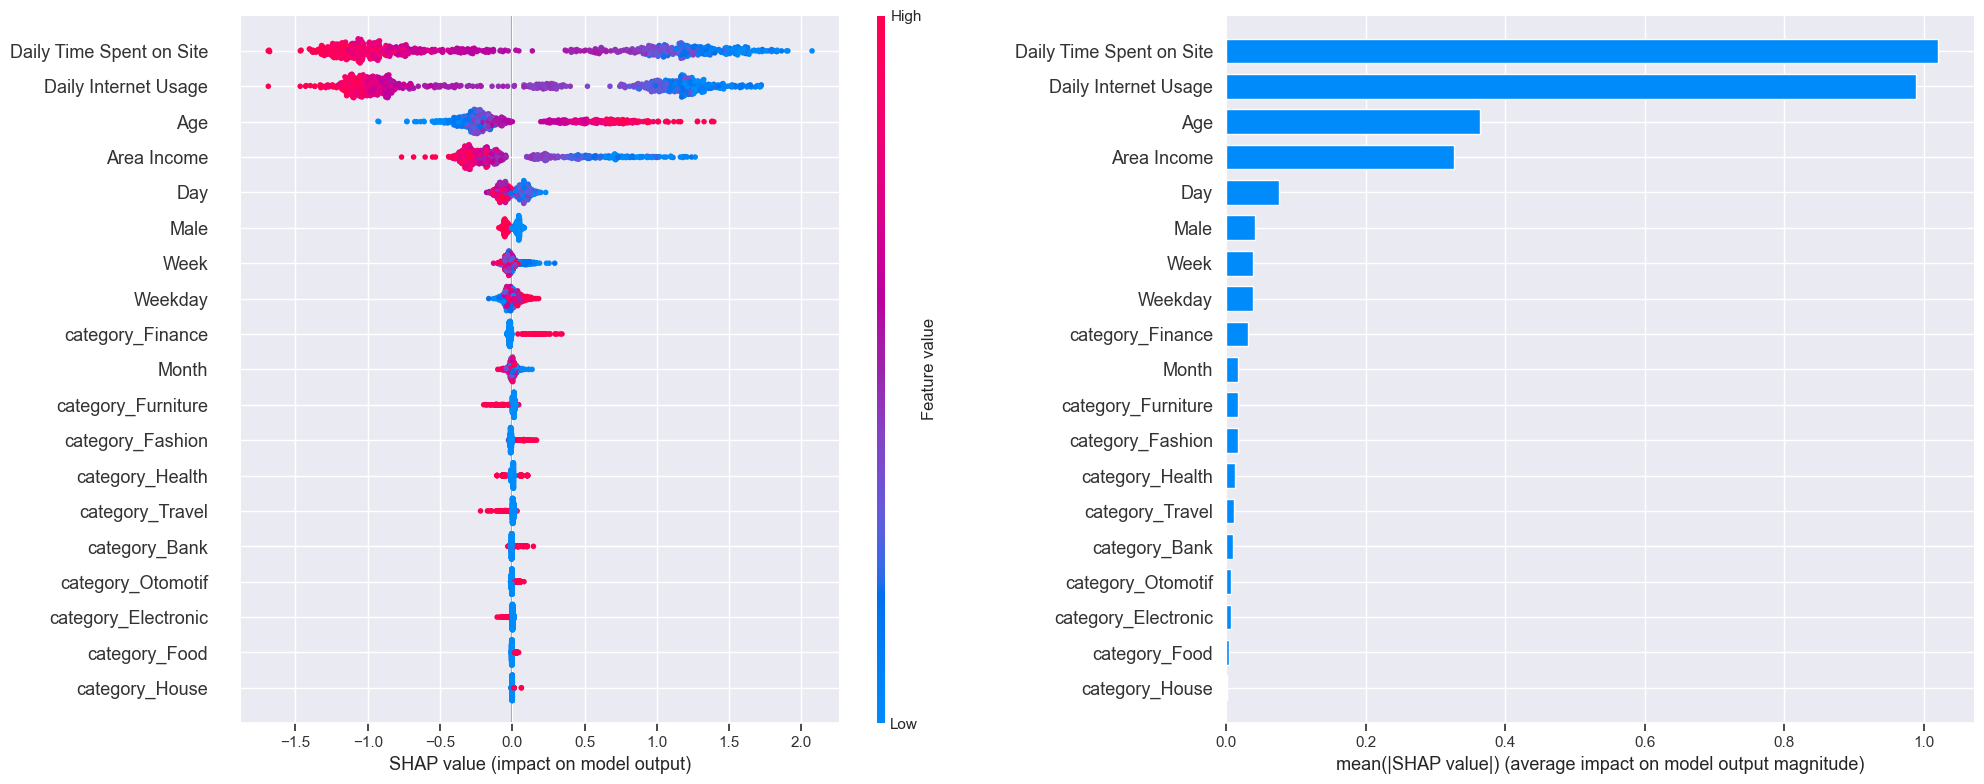

In [148]:
#SHAP for Gradient Boosting
import shap

explainer = shap.TreeExplainer(grad_best2)
shap_values = explainer.shap_values(X2_train)
expected = explainer.expected_value

fig = plt.figure()
ax0 = fig.add_subplot(121)
shap.summary_plot(shap_values, X2_train, show = False) 
ax1 = fig.add_subplot(122)
shap.summary_plot(shap_values, X2_train, plot_type='bar', show = False, cmap = "plasma")
plt.gcf().set_size_inches(20,8)
plt.tight_layout() 
plt.show()

**Observations:**
> The two most important features that affect to user whether to click on ad or not are `Daily Internet Usage` and `Daily Time Spent on Site`.
- The fewer the `Daily Internet Usage`, the more users click on ad. Otherwise, the higher the number of `Daily Internet Usage` the fewer users will click on ad.
- The lower the number of `Daily Time Spent on Site` the more users click on ad. Otherwise, the higher the number of `Daily Time Spent on Site` the fewer users will click on ad.

# Task 4 - Business Recommendation & Simulation

## Business Recommendation based on EDA & Feature Importance

According to insights that we have gathered on EDA and Feature Importance, we can determine the proper recommendation to increase customers to click on ads:

1. Customers who do not click on ads tend to be younger than the customers who do click on ads. That means the younger customers are not easily distracted by ads than the older customers even though they have spent more time on site. Hence, the ads should be ads that most probably relate to what customers searched for and not take much time and space on UI display.

2. Displaying ads to customers who have an income of more than 4 million is not recommended. That's probably because those customers when browsing the company website focus on what they are visiting for, so they are not too interested in other options that distract them.

3. The company has various sale categories. So that we can choose a specific category on a specific customer base on the trends of each category.

## Business Simulation

After a model is created, then we can create a simulation when the model is applied.

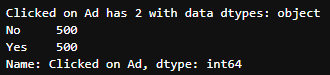

Assumpting : 
- Budget per advertisement is IDR 1.000
- revenue per click IDR 4.000 

**Without Applying ML Model**

- Calculating Cost:

cost = ads_cost * n_customer

cost = 1.000 * 1.000

cost = 1.000.000

- The conversion rate was 50% because 500 of 1000 users clicked on ads.

- Hence profit will be:

profit = (clicked_cust * revenue) - cost

profit = (500 * 4.000) - 1.000.000

profit = **IDR 1.000.000**

**With Applying ML Model**

According to ML Model performance, we can get 96% accuracy. So that means assuming we have 1000 customers, we can calculate the profit that can potentially get:

The same total cost of 1000 customers: 1.000.000

profit = (clicked_cust * revenue) - cost

profit = (960 * 4.000) - 1.000.000

profit = **IDR 2.840.000**

> **CONCLUSION:**
>
> Hence comparing with **before** and **after** using ML, we potentially significantly increase the revenue so we can get **284% more profit**.

# MISC

## Trial of lazy predict

In [ ]:
# from lazypredict.Supervised import LazyClassifier
# from sklearn.datasets import load_breast_cancer
# from sklearn.model_selection import train_test_split

# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X2_train, X2_test, y2_train, y2_test)

# print(models)